### Install libraries

In [1]:
# Install required libraries
# pip install pyod
# pip install pyperclip
# pip install pandas ydata-profiling

### Load Libraries

In [2]:
# Data manipulation and analysis
import pandas as pd

# Data profiling for generating summary reports
from ydata_profiling import ProfileReport

# Clipboard operations
import pyperclip

# Visualization
import matplotlib.pyplot as plt

# Numerical computations
import numpy as np

# Outlier detection using K-Nearest Neighbors
from pyod.models.knn import KNN  # K-Nearest Neighbors for outlier detection

# Utility functions for generating data and separating outliers/inliers
from pyod.utils.data import generate_data, get_outliers_inliers

### Load Data

In [3]:
# Load CSV files into Pandas DataFrames
df_flight = pd.read_csv(r"C:\Users\marti\OneDrive\Documents\Bildung\Studium\Data_Science\IU-Data_Science\Fallstudie - Model Engineering\Code\flight_information.csv")
df_ground = pd.read_csv(r"C:\Users\marti\OneDrive\Documents\Bildung\Studium\Data_Science\IU-Data_Science\Fallstudie - Model Engineering\Code\ground_information.csv")

# Configure Pandas display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 500)        # Prevent column width truncation

# Uncomment to preview the loaded DataFrames
# print(df_flight.head())
# print(df_ground.head())

# 2.0 Improve Data Understanding

### Analyse Data

In [4]:
# Generate profiling reports for the datasets
profile_flight = ProfileReport(df_flight, title="Flight Data Profiling Report")
profile_ground = ProfileReport(df_ground, title="Ground Data Profiling Report")

# Save reports as HTML files (uncomment to activate)
profile_flight.to_file("report_flight.html")  # Save flight data report
profile_ground.to_file("report_ground.html")  # Save ground data report

# Alternatively, display reports directly in a Jupyter Notebook (uncomment to activate)
# profile_flight.to_notebook_iframe()  # Display flight data report
# profile_ground.to_notebook_iframe()  # Display ground data report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Initial DataFrame investigations

# Display basic information about the DataFrame
df_flight.info()  # Overview of columns, data types, and non-null counts

# Uncomment below for additional insights:
# df_flight.head()       # Display the first 5 rows of the DataFrame
# df_flight.tail()       # Display the last 5 rows of the DataFrame
# df_flight.describe()   # Summary statistics for numerical columns
# df_flight.columns      # List all column names
# df_flight.dtypes       # Show data types for all columns
# df_flight.shape        # Show (row count, column count)
# df_flight.duplicated().sum()  # Count the number of duplicate rows
# df_flight.isnull().sum()      # Count missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12017 non-null  int64  
 1   leg_no              12017 non-null  int64  
 2   fn_carrier          12017 non-null  object 
 3   fn_number           12017 non-null  object 
 4   dep_ap_sched        12017 non-null  object 
 5   arr_ap_sched        12017 non-null  object 
 6   dep_sched_date      12017 non-null  object 
 7   dep_sched_time      12017 non-null  object 
 8   arr_sched_date      12017 non-null  object 
 9   arr_sched_time      12017 non-null  object 
 10  m_offblockdt        12017 non-null  object 
 11  m_onblockdt         11934 non-null  object 
 12  ac_registration     12017 non-null  object 
 13  change_reason_code  12017 non-null  object 
 14  dep_delay           12017 non-null  float64
 15  Ac Type Code        12017 non-null  object 
 16  tran

In [6]:
# Initial DataFrame investigations for ground data

# Display basic information about the DataFrame
df_ground.info()  # Overview of columns, data types, and non-null counts

# Uncomment below for additional insights:
# df_ground.head()          # Display the first 5 rows of the DataFrame
# df_ground.tail()          # Display the last 5 rows of the DataFrame
# df_ground.describe()      # Summary statistics for numerical columns
# df_ground.columns         # List all column names
# df_ground.dtypes          # Show data types for all columns
# df_ground.shape           # Show (row count, column count)
# df_ground.duplicated().sum()  # Count the number of duplicate rows
# df_ground.isnull().sum()      # Count missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4173 non-null   int64  
 1   day_of_origin          4173 non-null   object 
 2   ac_type                4173 non-null   object 
 3   fn_number              4173 non-null   object 
 4   ac_registration        4173 non-null   object 
 5   mingt                  4173 non-null   int64  
 6   dep_leg_inbound        4173 non-null   object 
 7   arr_leg_inbound        4173 non-null   object 
 8   arr_leg_outbound       4168 non-null   object 
 9   sched_inbound_dep      4173 non-null   object 
 10  sched_inbound_arr      4173 non-null   object 
 11  sched_outbound_dep     4173 non-null   object 
 12  sched_outbound_arr     4173 non-null   object 
 13  sched_turnaround       4173 non-null   int64  
 14  leg_inbound            4173 non-null   int64  
 15  leg_

## 2.1 Improve Data Quality

### Delete unneccessary columns

#### #1, #2

In [7]:
# Drop unnecessary columns from the DataFrame
df_flight_imp = df_flight.drop(columns=['Unnamed: 0', 'fn_carrier'])

#### #3

In [8]:
# Drop the 'Unnamed: 0' column from the ground data DataFrame
df_ground_imp = df_ground.drop(columns=['Unnamed: 0'])

#### #4

In [9]:
# Display unique values in 'cleaning_duration'
unique_cleaning_durations = df_ground_imp['cleaning_duration'].unique()
print("Unique values in 'cleaning_duration':")
print(unique_cleaning_durations)

# Drop the 'cleaning_duration' column
df_ground_imp = df_ground_imp.drop(columns=['cleaning_duration'])

# Verify the structure of the DataFrame after dropping the column
print("DataFrame structure after dropping 'cleaning_duration':")
print(df_ground_imp.head())

Unique values in 'cleaning_duration':
[        nan 33.71666667 14.         16.8       ]
DataFrame structure after dropping 'cleaning_duration':
  day_of_origin ac_type fn_number ac_registration  mingt    dep_leg_inbound arr_leg_inbound arr_leg_outbound    sched_inbound_dep    sched_inbound_arr   sched_outbound_dep   sched_outbound_arr  sched_turnaround  leg_inbound  leg_outbound  catering_duration  pax_boarding_duration
0    2019-06-01     DH4    EC3114          ECLGNX     35   East Melissaberg     East Carmen        Keithberg  2019-06-01 02:30:00  2019-06-01 04:15:00  2019-06-01 04:50:00  2019-06-01 05:40:00                35    272006092     272205857                 26                   26.0
1    2019-06-01     320    EC3316          ECLBIX     40   East Latashaview     East Carmen       Juliemouth  2019-06-01 03:15:00  2019-06-01 07:05:00  2019-06-01 07:50:00  2019-06-01 12:05:00                45    272027070     272029306                 27                   15.0
2    2019-06-01 

### Deletion of duplicates

#### #5

In [10]:
# Function to find and display duplicates in a DataFrame
def find_and_show_duplicates(df, column):
    """
    Identifies and displays duplicate values in a specified column of a DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        column (str): The column to check for duplicates.
    
    Returns:
        pd.Series: Duplicate values with their respective counts.
    """
    duplicates = df[column][df[column].duplicated(keep=False)]
    duplicate_count = duplicates.value_counts()
    
    print(f"Duplicates in '{column}':")
    print(duplicate_count)
    print(f"Total number of duplicates in '{column}': {duplicate_count.sum()}\n")
    
    return duplicates

# Check for duplicates in specific columns
duplicates_leg_no = find_and_show_duplicates(df_flight_imp, 'leg_no')
duplicates_leg_inbound = find_and_show_duplicates(df_ground_imp, 'leg_inbound')
duplicates_leg_outbound = find_and_show_duplicates(df_ground_imp, 'leg_outbound')

# Remove duplicates from the DataFrames
df_flight_imp = df_flight_imp.drop_duplicates(subset=['leg_no'], keep='first')
df_ground_imp = df_ground_imp.drop_duplicates(subset=['leg_inbound'], keep='first')
df_ground_imp = df_ground_imp.drop_duplicates(subset=['leg_outbound'], keep='first')

# Verify the number of remaining rows
print(f"Number of remaining rows in 'df_flight_imp': {len(df_flight_imp)}")
print(f"Number of remaining rows in 'df_ground_imp': {len(df_ground_imp)}")

Duplicates in 'leg_no':
leg_no
272104742    2
272104743    2
271999092    2
272359174    2
272088107    2
272088106    2
272104748    2
272104749    2
272218013    2
272101014    2
272088109    2
272088108    2
272006261    2
272360102    2
272088110    2
272088111    2
272218014    2
272101016    2
272088112    2
272088105    2
272088104    2
272101012    2
272101010    2
272218010    2
272101008    2
272088097    2
272088096    2
272104744    2
272104745    2
272218011    2
272088100    2
272218012    2
272088101    2
272088457    2
272088458    2
272088102    2
272088103    2
272104746    2
272104747    2
272088113    2
Name: count, dtype: int64
Total number of duplicates in 'leg_no': 80

Duplicates in 'leg_inbound':
leg_inbound
272104743    4
272088097    4
272104745    4
272088101    4
272088458    4
272088103    4
272104747    4
272088105    4
272359174    4
272088107    4
272104749    4
272088109    4
272360102    4
272088113    4
Name: count, dtype: int64
Total number of duplic

### Renaming columns to a consistent nomenclature

#### #6

In [11]:
# Rename columns for consistency
df_flight_imp = df_flight_imp.rename(columns={
    "Sched Groundtime": "sched_ground_time",
    "Act Groundtime": "act_ground_time",
    "Ac Type Code": "ac_type_code",
    "Crew Group": "crew_group",
    "TLC_trans": "tlc_trans"
})

# Verify the updated column names
print("Updated column names in 'df_flight_imp':")
print(df_flight_imp.columns)

Updated column names in 'df_flight_imp':
Index(['leg_no', 'fn_number', 'dep_ap_sched', 'arr_ap_sched', 'dep_sched_date', 'dep_sched_time', 'arr_sched_date', 'arr_sched_time', 'm_offblockdt', 'm_onblockdt', 'ac_registration', 'change_reason_code', 'dep_delay', 'ac_type_code', 'trans_time', 'sched_trans_time', 'crew_group', 'tlc_trans', 'crew_type_change', 'sched_ground_time', 'act_ground_time'], dtype='object')


### Standardizing timestamps

#### #7, #8, #9

In [12]:
# Combine 'dep_sched_date' and 'dep_sched_time' into a new datetime column
df_flight_imp['dep_sched'] = pd.to_datetime(df_flight_imp['dep_sched_date'] + ' ' + df_flight_imp['dep_sched_time'])

# Reorder columns: Insert 'dep_sched' next to 'dep_sched_date'
cols = df_flight_imp.columns.tolist()
position = cols.index('dep_sched_date')  # Find the position of 'dep_sched_date'
cols.insert(position, cols.pop(cols.index('dep_sched')))  # Move 'dep_sched' to the desired position
df_flight_imp = df_flight_imp[cols]

# Drop the original 'dep_sched_date' and 'dep_sched_time' columns
df_flight_imp = df_flight_imp.drop(columns=['dep_sched_date', 'dep_sched_time'])

# Verify the data type of the new column
print("Data type of 'dep_sched':", df_flight_imp['dep_sched'].dtype)

# Combine 'arr_sched_date' and 'arr_sched_time' into a new datetime column
df_flight_imp['arr_sched'] = pd.to_datetime(df_flight_imp['arr_sched_date'] + ' ' + df_flight_imp['arr_sched_time'])

# Reorder columns: Insert 'arr_sched' next to 'arr_sched_date'
cols = df_flight_imp.columns.tolist()
position = cols.index('arr_sched_date')  # Find the position of 'arr_sched_date'
cols.insert(position, cols.pop(cols.index('arr_sched')))  # Move 'arr_sched' to the desired position
df_flight_imp = df_flight_imp[cols]

# Drop the original 'arr_sched_date' and 'arr_sched_time' columns
df_flight_imp = df_flight_imp.drop(columns=['arr_sched_date', 'arr_sched_time'])

# Verify the data type of the new column
print("Data type of 'arr_sched':", df_flight_imp['arr_sched'].dtype)

# Convert columns to datetime data type
datetime_columns_ground = ['sched_outbound_arr', 'sched_outbound_dep', 'sched_inbound_arr', 'sched_inbound_dep']
df_ground_imp[datetime_columns_ground] = df_ground_imp[datetime_columns_ground].apply(pd.to_datetime)

datetime_columns_flight = ['dep_sched', 'arr_sched', 'm_offblockdt', 'm_onblockdt']
df_flight_imp[datetime_columns_flight] = df_flight_imp[datetime_columns_flight].apply(pd.to_datetime)

# Verify the data types of converted columns
print("Ground data datetime columns:")
print(df_ground_imp[datetime_columns_ground].dtypes)

print("\nFlight data datetime columns:")
print(df_flight_imp[datetime_columns_flight].dtypes)

Data type of 'dep_sched': datetime64[ns]
Data type of 'arr_sched': datetime64[ns]
Ground data datetime columns:
sched_outbound_arr    datetime64[ns]
sched_outbound_dep    datetime64[ns]
sched_inbound_arr     datetime64[ns]
sched_inbound_dep     datetime64[ns]
dtype: object

Flight data datetime columns:
dep_sched       datetime64[ns]
arr_sched       datetime64[ns]
m_offblockdt    datetime64[ns]
m_onblockdt     datetime64[ns]
dtype: object


### Handling missing values

#### #10 Removing missing values from m_onblockdt

In [13]:
# Count missing values in the 'm_onblockdt' column
missing_values_count = df_flight_imp['m_onblockdt'].isnull().sum()

# Print the result with a clear message
print(f"Number of missing values in 'm_onblockdt': {missing_values_count}")

Number of missing values in 'm_onblockdt': 81


In [14]:
# Remove rows where 'm_onblockdt' is missing
df_flight_imp = df_flight_imp.dropna(subset=['m_onblockdt'])

# Verify the number of remaining rows
remaining_rows = df_flight_imp.shape[0]
print(f"Number of remaining rows after removing missing values: {remaining_rows}")

Number of remaining rows after removing missing values: 11896


In [15]:
# Count missing values in the 'm_onblockdt' column
missing_values_count = df_flight_imp['m_onblockdt'].isnull().sum()

# Display the count of missing values
print(f"Number of missing values in 'm_onblockdt': {missing_values_count}")

Number of missing values in 'm_onblockdt': 0


#### Deferred

In [16]:
# # Identify 'leg_no' values with missing 'm_onblockdt'
# missing_leg_no = df_flight_imp.loc[df_flight_imp['m_onblockdt'].isnull(), 'leg_no']

# # Display the results
# print("Leg Nos with missing values in 'm_onblockdt':")
# print(missing_leg_no.tolist())

In [17]:
# # Find 'leg_no' values that are missing in 'm_onblockdt' and present in 'df_ground_imp'
# common_leg_no = missing_leg_no[missing_leg_no.isin(df_ground_imp['leg_inbound'])]

# # Display the results
# print("Leg Nos with missing values in 'm_onblockdt' that also exist in 'df_ground_imp':")
# print(common_leg_no.tolist())

##### Identification of missing values using fn_number

In [18]:
# # Identify 'fn_number' values where 'm_onblockdt' is missing
# missing_fn_number = df_flight_imp.loc[df_flight_imp['m_onblockdt'].isnull(), 'fn_number']

# # Display the flight numbers with missing 'm_onblockdt'
# print("Flight numbers (fn_number) with missing values in 'm_onblockdt':")
# print(missing_fn_number.tolist())

In [19]:
# # Identify rows with missing 'm_onblockdt' and retrieve relevant columns
# missing_data = df_flight_imp.loc[df_flight_imp['m_onblockdt'].isnull(), ['fn_number', 'arr_sched']]

# # Display the flight numbers and scheduled arrival times for missing 'm_onblockdt' values
# print("Mapping of missing 'm_onblockdt' values:")
# print(missing_data)

In [20]:
# # Check if the combination of 'fn_number' and 'arr_sched' exists in df_ground_imp
# merged_df = missing_data.merge(
#     df_ground_imp,
#     left_on=['fn_number', 'arr_sched'],
#     right_on=['fn_number', 'sched_inbound_arr'],
#     how='left',
#     indicator=True
# )

# # Filter rows that have a match in df_ground_imp
# matching_rows = merged_df[merged_df['_merge'] == 'both']

# # Display the matching rows
# print("Missing 'm_onblockdt' values found in df_ground_imp:")
# print(matching_rows[['fn_number', 'sched_inbound_arr']])


##### Removing the corresponding data based on leg_no in df_ground_imp

In [21]:
# # Filter rows in df_ground_imp where 'leg_outbound' or 'leg_inbound' match values in missing_leg_no
# matching_rows = df_ground_imp[
#     df_ground_imp['leg_outbound'].isin(missing_leg_no) |
#     df_ground_imp['leg_inbound'].isin(missing_leg_no)
# ]

# # Display matching rows
# print("Matching entries in 'leg_outbound' or 'leg_inbound':")
# print(matching_rows[['leg_outbound', 'leg_inbound']])

In [22]:
# # Remove rows from df_ground_imp where 'leg_inbound' matches any value in missing_leg_no
# df_ground_imp = df_ground_imp[~df_ground_imp['leg_inbound'].isin(missing_leg_no)]

# # Verify the number of remaining rows in df_ground_imp
# remaining_rows = df_ground_imp.shape[0]
# print(f"Number of remaining rows in df_ground_imp after removing matching 'leg_no': {remaining_rows}")

##### Create a function to fill missing values

In [23]:
# # Define a function to fill missing values in a column based on values from another DataFrame
# def fill_missing_values(df_flight, df_ground, flight_column, ground_column, merge_column, fill_column):
#     """
#     Fills missing values in a specified column of df_flight using corresponding values
#     from df_ground, based on a common key column.

#     Args:
#         df_flight (pd.DataFrame): DataFrame with missing values to be filled.
#         df_ground (pd.DataFrame): Reference DataFrame for filling values.
#         flight_column (str): Column in df_flight with missing values.
#         ground_column (str): Column in df_ground used for merging.
#         merge_column (str): Common column in df_flight and df_ground for matching rows.
#         fill_column (str): Column in df_ground containing the values to fill.

#     Returns:
#         pd.DataFrame: Updated df_flight with missing values filled.
#     """
#     # Count missing values before filling
#     missing_values_count = df_flight[flight_column].isnull().sum()
#     print(f"Missing values in '{flight_column}' before filling: {missing_values_count}")
    
#     # Identify rows with missing values in df_flight
#     missing_leg_no = df_flight.loc[df_flight[flight_column].isnull(), merge_column]
#     print(f"Leg Nos with missing values in '{flight_column}': {missing_leg_no.tolist()}")
    
#     # Find common leg_no values in df_ground
#     common_leg_no = missing_leg_no[missing_leg_no.isin(df_ground[ground_column])]
#     print(f"Number of matching leg_no values in '{ground_column}': {common_leg_no.nunique()}")
    
#     # Merge df_flight with df_ground to fill missing values
#     df_flight_updated = df_flight.merge(
#         df_ground[[ground_column, fill_column]],
#         left_on=merge_column,
#         right_on=ground_column,
#         how='left'
#     )
    
#     # Fill missing values in flight_column using values from fill_column
#     df_flight_updated[flight_column] = df_flight_updated[flight_column].fillna(df_flight_updated[fill_column])
    
#     # Drop auxiliary columns after filling
#     df_flight_updated = df_flight_updated.drop(columns=[fill_column, ground_column])
    
#     # Count missing values after filling
#     missing_values_new_count = df_flight_updated[flight_column].isnull().sum()
#     print(f"Missing values in '{flight_column}' after filling: {missing_values_new_count}")
    
#     return df_flight_updated

##### Fill missing values in leg_inbound

In [24]:
# # Call the function to fill missing values in 'sched_ground_time' using 'sched_turnaround' and 'leg_inbound'
# df_flight_imp_updated = fill_missing_values(
#     df_flight=df_flight_imp,
#     df_ground=df_ground_imp,
#     flight_column='sched_ground_time',
#     ground_column='leg_inbound',
#     merge_column='leg_no',
#     fill_column='sched_turnaround'
# )

##### FIll missing values in leg_outbound

In [25]:
# # Call the function to fill missing values in 'sched_ground_time' using 'sched_turnaround' and 'leg_outbound'
# df_flight_imp_updated = fill_missing_values(
#     df_flight=df_flight_imp,
#     df_ground=df_ground_imp,
#     flight_column='sched_ground_time',
#     ground_column='leg_outbound',
#     merge_column='leg_no',
#     fill_column='sched_turnaround'
# )

#### #11 Deleting missing values in sched_ground_time

In [26]:
# Count missing values in the 'sched_ground_time' column
missing_sched_ground_time = df_flight_imp['sched_ground_time'].isnull().sum()
print(f"Number of missing values in 'sched_ground_time': {missing_sched_ground_time}")

# Remove rows with missing 'sched_ground_time' values
df_flight_imp = df_flight_imp.dropna(subset=['sched_ground_time'])

# Verify the number of remaining rows
remaining_rows = len(df_flight_imp)
print(f"Number of remaining rows after removal: {remaining_rows}")

Number of missing values in 'sched_ground_time': 1992
Number of remaining rows after removal: 9904


#### #12 Deleting negative values and values under 30 from sched_turnaround

In [27]:
# Count the number of values in 'sched_ground_time' less than 30 minutes
negative_values_count = (df_flight_imp['sched_ground_time'] < 30).sum()
print(f"Number of values in 'sched_ground_time' less than 30: {negative_values_count}")

# 1. Identify and store 'leg_no' values with 'sched_ground_time' less than 30
leg_no_to_remove = df_flight_imp[df_flight_imp['sched_ground_time'] < 30]['leg_no'].unique()

# Count matching 'leg_no' in df_ground_imp (in 'leg_inbound' or 'leg_outbound')
matching_leg_no_count = df_ground_imp[
    df_ground_imp[['leg_inbound', 'leg_outbound']].isin(leg_no_to_remove).any(axis=1)
]['leg_inbound'].nunique()
print(f"Number of matching 'leg_no' in df_ground_imp: {matching_leg_no_count}")

# 2. Remove rows from df_flight_imp where 'sched_ground_time' is less than 30
df_flight_imp = df_flight_imp[df_flight_imp['sched_ground_time'] >= 30]

# 3. Remove corresponding rows in df_ground_imp based on 'leg_inbound' or 'leg_outbound'
df_ground_imp = df_ground_imp[
    ~df_ground_imp[['leg_inbound', 'leg_outbound']].isin(leg_no_to_remove).any(axis=1)
]

# Display the number of remaining rows after deletion
print(f"Remaining rows in df_flight_imp: {len(df_flight_imp)}")
print(f"Remaining rows in df_ground_imp: {len(df_ground_imp)}")

Number of values in 'sched_ground_time' less than 30: 112
Number of matching 'leg_no' in df_ground_imp: 90
Remaining rows in df_flight_imp: 9792
Remaining rows in df_ground_imp: 4041


#### #13 Missing values in sched_turnaround

In [28]:
# 1. Identify rows where 'sched_turnaround' is less than 30
turnaround_less_than_30 = df_ground_imp[df_ground_imp['sched_turnaround'] < 30]

# 2. Output the number of rows where 'sched_turnaround' is less than 30
count_less_than_30 = len(turnaround_less_than_30)
print(f"Number of rows where 'sched_turnaround' is less than 30: {count_less_than_30}")

# 3. Display the identified rows
if count_less_than_30 > 0:
    print("Rows with 'sched_turnaround' less than 30:")
    print(turnaround_less_than_30)
else:
    print("No rows found with 'sched_turnaround' less than 30.")

# 4. Remove rows where 'sched_turnaround' is less than 30
df_ground_imp = df_ground_imp[df_ground_imp['sched_turnaround'] >= 30]

# 5. Output the number of remaining rows in the DataFrame
remaining_rows = len(df_ground_imp)
print(f"Number of remaining rows after deletion: {remaining_rows}")

Number of rows where 'sched_turnaround' is less than 30: 4
Rows with 'sched_turnaround' less than 30:
     day_of_origin ac_type fn_number ac_registration  mingt       dep_leg_inbound arr_leg_inbound  arr_leg_outbound   sched_inbound_dep   sched_inbound_arr  sched_outbound_dep  sched_outbound_arr  sched_turnaround  leg_inbound  leg_outbound  catering_duration  pax_boarding_duration
262     2019-06-03     DH4    EC3174          ECLGHX     35            Lake Kevin     East Carmen          Paulbury 2019-06-03 05:00:00 2019-06-03 05:45:00 2019-06-03 05:15:00 2019-06-03 06:30:00               -30    272011927     272004000                 22                   12.0
733     2019-06-06     E95    EC3028          ECLWJX     40           Gilbertland     East Carmen  East Toddchester 2019-06-06 08:10:00 2019-06-06 09:50:00 2019-06-06 08:25:00 2019-06-06 10:40:00               -85    271999288     272357145                 21                  214.0
1655    2019-06-12     319    EC3010          ECL

#### #14 Transfer catering duration

In [29]:
# Merge df_flight_imp with df_ground_imp for inbound catering duration
df_flight_imp = df_flight_imp.merge(
    df_ground_imp[['leg_inbound', 'catering_duration']],
    left_on='leg_no',
    right_on='leg_inbound',
    how='left'
)

# Rename the column for inbound catering duration
df_flight_imp.rename(columns={'catering_duration': 'catering_duration_inbound'}, inplace=True)

# Merge df_flight_imp with df_ground_imp for outbound catering duration
df_flight_imp = df_flight_imp.merge(
    df_ground_imp[['leg_outbound', 'catering_duration']],
    left_on='leg_no',
    right_on='leg_outbound',
    how='left'
)

# Rename the column for outbound catering duration
df_flight_imp.rename(columns={'catering_duration': 'catering_duration_outbound'}, inplace=True)

# Combine inbound and outbound catering durations into a single column
df_flight_imp['catering_duration'] = df_flight_imp['catering_duration_inbound'].combine_first(
    df_flight_imp['catering_duration_outbound']
)

# Drop unnecessary columns
df_flight_imp.drop(
    ['leg_inbound', 'leg_outbound', 'catering_duration_inbound', 'catering_duration_outbound'],
    axis=1,
    inplace=True
)

# Count the number of rows with non-missing catering duration
matches = df_flight_imp['catering_duration'].notna().sum()
print(f"Total number of matches for 'catering_duration': {matches}")

# Display the first few rows of the updated DataFrame
df_flight_imp.head()

Total number of matches for 'catering_duration': 7174


,leg_no,fn_number,dep_ap_sched,arr_ap_sched,dep_sched,arr_sched,m_offblockdt,m_onblockdt,ac_registration,change_reason_code,dep_delay,ac_type_code,trans_time,sched_trans_time,crew_group,tlc_trans,crew_type_change,sched_ground_time,act_ground_time,catering_duration
0,272005011,EC3098,North Gregory,East Carmen,2019-06-01 00:40:00,2019-06-01 04:30:00,2019-06-01 00:43:00,2019-06-01 04:12:00,ECLBSX,other problem,3.0,320,0,0,Start,"['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...",[],235.0,268.0,NaN
1,272009188,EC3146,Port Bobby,East Carmen,2019-06-01 02:05:00,2019-06-01 04:00:00,2019-06-01 01:58:00,2019-06-01 03:40:00,ECLWHX,no reason,-7.0,E95,0,0,Start,"['Scott Baker_nan_nan_nan_cp', 'Ruth Hoffman_n...",[],130.0,189.0,NaN
2,271984537,EC2840,Port Ryan,East Carmen,2019-06-01 02:20:00,2019-06-01 03:50:00,2019-06-01 02:24:00,2019-06-01 03:57:00,ECLGLX,other problem,4.0,DH4,0,0,Start,"['Cory Cooper_nan_nan_nan_ca', 'Morgan Foster_...",[],185.0,196.0,NaN
3,272025831,EC3306,Coleland,East Carmen,2019-06-01 02:25:00,2019-06-01 04:00:00,2019-06-01 02:28:00,2019-06-01 03:49:00,ECLBMX,other problem,3.0,320,0,0,Start,"['Anne Davis_nan_nan_nan_ca', 'Miss Amanda Har...",[],145.0,175.0,NaN
4,272006092,EC3114,East Melissaberg,East Carmen,2019-06-01 02:30:00,2019-06-01 04:15:00,2019-06-01 03:02:00,2019-06-01 04:43:00,ECLGNX,other problem,32.0,DH4,0,0,Start,"['Renee Fisher_nan_nan_nan_ca', 'Rebecca Castr...",[],35.0,21.0,26.0


#### #15 transfer boarding duration

In [30]:
# Merge df_flight_imp with df_ground_imp for inbound pax boarding duration
df_flight_imp = df_flight_imp.merge(
    df_ground_imp[['leg_inbound', 'pax_boarding_duration']],
    left_on='leg_no',
    right_on='leg_inbound',
    how='left'
)

# Rename the column for inbound pax boarding duration
df_flight_imp.rename(columns={'pax_boarding_duration': 'pax_boarding_duration_inbound'}, inplace=True)

# Merge df_flight_imp with df_ground_imp for outbound pax boarding duration
df_flight_imp = df_flight_imp.merge(
    df_ground_imp[['leg_outbound', 'pax_boarding_duration']],
    left_on='leg_no',
    right_on='leg_outbound',
    how='left'
)

# Rename the column for outbound pax boarding duration
df_flight_imp.rename(columns={'pax_boarding_duration': 'pax_boarding_duration_outbound'}, inplace=True)

# Combine inbound and outbound pax boarding durations into a single column
df_flight_imp['pax_boarding_duration'] = df_flight_imp['pax_boarding_duration_inbound'].combine_first(
    df_flight_imp['pax_boarding_duration_outbound']
)

# Drop unnecessary columns
df_flight_imp.drop(
    ['leg_inbound', 'leg_outbound', 'pax_boarding_duration_inbound', 'pax_boarding_duration_outbound'],
    axis=1,
    inplace=True
)

# Count the number of rows with non-missing pax boarding duration
matches = df_flight_imp['pax_boarding_duration'].notna().sum()
print(f"Total number of matches for 'pax_boarding_duration': {matches}")

# Display the first few rows of the updated DataFrame
df_flight_imp.head()

Total number of matches for 'pax_boarding_duration': 6491


,leg_no,fn_number,dep_ap_sched,arr_ap_sched,dep_sched,arr_sched,m_offblockdt,m_onblockdt,ac_registration,change_reason_code,dep_delay,ac_type_code,trans_time,sched_trans_time,crew_group,tlc_trans,crew_type_change,sched_ground_time,act_ground_time,catering_duration,pax_boarding_duration
0,272005011,EC3098,North Gregory,East Carmen,2019-06-01 00:40:00,2019-06-01 04:30:00,2019-06-01 00:43:00,2019-06-01 04:12:00,ECLBSX,other problem,3.0,320,0,0,Start,"['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...",[],235.0,268.0,NaN,NaN
1,272009188,EC3146,Port Bobby,East Carmen,2019-06-01 02:05:00,2019-06-01 04:00:00,2019-06-01 01:58:00,2019-06-01 03:40:00,ECLWHX,no reason,-7.0,E95,0,0,Start,"['Scott Baker_nan_nan_nan_cp', 'Ruth Hoffman_n...",[],130.0,189.0,NaN,NaN
2,271984537,EC2840,Port Ryan,East Carmen,2019-06-01 02:20:00,2019-06-01 03:50:00,2019-06-01 02:24:00,2019-06-01 03:57:00,ECLGLX,other problem,4.0,DH4,0,0,Start,"['Cory Cooper_nan_nan_nan_ca', 'Morgan Foster_...",[],185.0,196.0,NaN,NaN
3,272025831,EC3306,Coleland,East Carmen,2019-06-01 02:25:00,2019-06-01 04:00:00,2019-06-01 02:28:00,2019-06-01 03:49:00,ECLBMX,other problem,3.0,320,0,0,Start,"['Anne Davis_nan_nan_nan_ca', 'Miss Amanda Har...",[],145.0,175.0,NaN,NaN
4,272006092,EC3114,East Melissaberg,East Carmen,2019-06-01 02:30:00,2019-06-01 04:15:00,2019-06-01 03:02:00,2019-06-01 04:43:00,ECLGNX,other problem,32.0,DH4,0,0,Start,"['Renee Fisher_nan_nan_nan_ca', 'Rebecca Castr...",[],35.0,21.0,26.0,26.0


#### Transfer of matching values of sched_turnaround from both df

In [31]:
# Merge df_flight_imp and df_ground_imp for comparison based on 'leg_inbound'
df_merge_inbound = df_flight_imp.merge(
    df_ground_imp[['leg_inbound', 'sched_turnaround', 'fn_number']],
    left_on='leg_no',
    right_on='leg_inbound',
    how='inner'
)

# Compare 'sched_ground_time' and 'sched_turnaround' for inbound legs
matches_inbound = df_merge_inbound['sched_ground_time'] == df_merge_inbound['sched_turnaround']

# Check if 'fn_number' matches
fn_number_matches_inbound = df_merge_inbound['fn_number_x'] == df_merge_inbound['fn_number_y']

# Combine both conditions
final_matches_inbound = matches_inbound & fn_number_matches_inbound

# Count matches and differences
num_matches_inbound = final_matches_inbound.sum()
num_differences_inbound = (~final_matches_inbound).sum()

print(f"Number of matches (inbound): {num_matches_inbound}")
print(f"Number of differences (inbound): {num_differences_inbound}\n")

# Display rows with differences for 'leg_inbound'
print("Rows with differences for 'leg_inbound':")
df_differences_inbound = df_merge_inbound[~final_matches_inbound]
print(df_differences_inbound[['leg_no', 'sched_ground_time', 'sched_turnaround', 'fn_number_x', 'fn_number_y']])

# Display rows where 'fn_number' does not match
fn_number_differences = df_differences_inbound[~fn_number_matches_inbound]
print("\nRows with different 'fn_number' for 'leg_inbound':")
print(fn_number_differences[['leg_no', 'sched_ground_time', 'sched_turnaround', 'fn_number_x', 'fn_number_y']])

# Extract unique 'leg_no' values with differences
different_legs_inbound = df_differences_inbound['leg_no'].unique()

# Remove rows with mismatched 'leg_no' from both DataFrames
df_flight_imp = df_flight_imp[~df_flight_imp['leg_no'].isin(different_legs_inbound)]
df_ground_imp = df_ground_imp[~df_ground_imp['leg_inbound'].isin(different_legs_inbound)]

# Final output of remaining rows
print(f"Remaining rows in df_flight_imp: {len(df_flight_imp)}")
print(f"Remaining rows in df_ground_imp: {len(df_ground_imp)}")

Number of matches (inbound): 3998
Number of differences (inbound): 9

Rows with differences for 'leg_inbound':
         leg_no  sched_ground_time  sched_turnaround fn_number_x fn_number_y
393   271961157              400.0                65      EC2614      EC2614
1014  272015977              360.0                50      EC3220      EC3220
1102  272100521              430.0                65     EC11460     EC11460
1207  272031753              510.0                65      EC3376      EC3376
1277  271998872              245.0                45      EC3026      EC3026
1405  272012775              125.0                40      EC3184      EC3184
2412  272003805              135.0                50      EC3080      EC3080
2566  272210730              235.0                60      EC3230      EC3230
2953  272229279              285.0                40      EC2836      EC2836

Rows with different 'fn_number' for 'leg_inbound':
Empty DataFrame
Columns: [leg_no, sched_ground_time, sched_turnarou

C:\Users\marti\AppData\Local\Temp\ipykernel_48288\4037187434.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fn_number_differences = df_differences_inbound[~fn_number_matches_inbound]


##### Values of leg_outbound do not match with leg_no and fn_number

In [32]:
# # Merge df_flight_imp and df_ground_imp for comparison based on 'leg_outbound'
# df_merge_outbound = df_flight_imp.merge(
#     df_ground_imp[['leg_outbound', 'sched_turnaround', 'fn_number']],
#     left_on='leg_no',
#     right_on='leg_outbound',
#     how='inner'
# )

# # Compare 'sched_ground_time' and 'sched_turnaround' for outbound legs
# matches_outbound = df_merge_outbound['sched_ground_time'] == df_merge_outbound['sched_turnaround']

# # Check if 'fn_number' matches
# fn_number_matches_outbound = df_merge_outbound['fn_number_x'] == df_merge_outbound['fn_number_y']

# # Combine both conditions
# final_matches_outbound = matches_outbound & fn_number_matches_outbound

# # Count matches and differences
# num_matches_outbound = final_matches_outbound.sum()
# num_differences_outbound = (~final_matches_outbound).sum()

# print(f"Number of matches (outbound): {num_matches_outbound}")
# print(f"Number of differences (outbound): {num_differences_outbound}\n")

# # Display rows with differences for 'leg_outbound'
# print("Rows with differences for 'leg_outbound':")
# df_differences_outbound = df_merge_outbound[~final_matches_outbound]
# print(df_differences_outbound[['leg_no', 'sched_ground_time', 'sched_turnaround', 'fn_number_x', 'fn_number_y']])

# # Display rows where 'fn_number' does not match
# fn_number_differences_outbound = df_differences_outbound[~fn_number_matches_outbound]
# print("\nRows with different 'fn_number' for 'leg_outbound':")
# print(fn_number_differences_outbound[['leg_no', 'sched_ground_time', 'sched_turnaround', 'fn_number_x', 'fn_number_y']])

## 2.2 Feature Engineering

### Calculate flight times

In [33]:
def move_columns_after(df, columns_to_move, reference_column):
    """
    Move specified columns to appear immediately after a reference column in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to modify.
    - columns_to_move (list): List of columns to move.
    - reference_column (str): The column after which the specified columns will be moved.

    Returns:
    - pd.DataFrame: Modified DataFrame with columns rearranged.
    """
    # Get the list of current columns
    columns = list(df.columns)
    
    # Ensure the reference column exists in the DataFrame
    if reference_column not in columns:
        raise ValueError(f"Reference column '{reference_column}' not found in DataFrame.")
    
    # Ensure all columns to move exist in the DataFrame
    missing_columns = [col for col in columns_to_move if col not in columns]
    if missing_columns:
        raise ValueError(f"Columns {missing_columns} not found in DataFrame.")
    
    # Get the index of the reference column
    reference_index = columns.index(reference_column)
    
    # Filter out the columns to move from the existing column order
    columns_to_keep = [col for col in columns if col not in columns_to_move]
    
    # Insert the columns to move after the reference column
    for i, col in enumerate(columns_to_move):
        columns_to_keep.insert(reference_index + 1 + i, col)
    
    # Reorder the DataFrame columns
    return df[columns_to_keep]

#### #16, #17 Calculate act_flight_time

In [34]:
# 1. Calculate 'act_flight_time' in minutes
df_flight_imp['act_flight_time'] = (df_flight_imp['m_onblockdt'] - df_flight_imp['m_offblockdt']).dt.total_seconds() / 60

# 2. Calculate 'sched_flight_time' in minutes
df_flight_imp['sched_flight_time'] = (df_flight_imp['arr_sched'] - df_flight_imp['dep_sched']).dt.total_seconds() / 60

# Optional: Show flight times in HH:MM format
# Uncomment the following lines if needed
# df_flight_imp['act_flight_time_hm'] = df_flight_imp['act_flight_time'].apply(lambda x: f"{int(x // 60)}h {int(x % 60)}m")
# df_flight_imp['sched_flight_time_hm'] = df_flight_imp['sched_flight_time'].apply(lambda x: f"{int(x // 60)}h {int(x % 60)}m")

# Display the first few rows to verify the result
print(df_flight_imp[['m_onblockdt', 'm_offblockdt', 'act_flight_time', 'arr_sched', 'dep_sched', 'sched_flight_time']].head())

          m_onblockdt        m_offblockdt  act_flight_time           arr_sched           dep_sched  sched_flight_time
0 2019-06-01 04:12:00 2019-06-01 00:43:00            209.0 2019-06-01 04:30:00 2019-06-01 00:40:00              230.0
1 2019-06-01 03:40:00 2019-06-01 01:58:00            102.0 2019-06-01 04:00:00 2019-06-01 02:05:00              115.0
2 2019-06-01 03:57:00 2019-06-01 02:24:00             93.0 2019-06-01 03:50:00 2019-06-01 02:20:00               90.0
3 2019-06-01 03:49:00 2019-06-01 02:28:00             81.0 2019-06-01 04:00:00 2019-06-01 02:25:00               95.0
4 2019-06-01 04:43:00 2019-06-01 03:02:00            101.0 2019-06-01 04:15:00 2019-06-01 02:30:00              105.0


### Calculate time differences

#### #18, #19 Actual vs planned departure & arrival time --> dep_delay, arr_delay

In [35]:
# Calculate the delay between 'dep_sched' and 'm_offblockdt' in minutes
df_flight_imp['dep_del'] = df_flight_imp['m_offblockdt'] - df_flight_imp['dep_sched']
df_flight_imp['dep_del'] = df_flight_imp['dep_del'].apply(lambda x: x.total_seconds() / 60 if pd.notnull(x) else None)

# Calculate the delay between 'arr_sched' and 'm_onblockdt' in minutes
df_flight_imp['arr_delay'] = df_flight_imp['m_onblockdt'] - df_flight_imp['arr_sched']
df_flight_imp['arr_delay'] = df_flight_imp['arr_delay'].apply(lambda x: x.total_seconds() / 60 if pd.notnull(x) else None)

# Reorder columns: Place 'dep_del' after 'm_onblockdt'
col_order = df_flight_imp.columns.tolist()
insert_position_dep = col_order.index('m_onblockdt') + 1
col_order.insert(insert_position_dep, col_order.pop(col_order.index('dep_del')))

# Place 'arr_delay' after 'dep_del'
insert_position_arr = col_order.index('dep_del') + 1
col_order.insert(insert_position_arr, col_order.pop(col_order.index('arr_delay')))

# Reorder the DataFrame columns
df_flight_imp = df_flight_imp[col_order]

# Display the first few rows to verify the changes
print(df_flight_imp.head())

      leg_no fn_number      dep_ap_sched arr_ap_sched           dep_sched           arr_sched        m_offblockdt         m_onblockdt  dep_del  arr_delay ac_registration change_reason_code  dep_delay ac_type_code  trans_time  sched_trans_time crew_group                                          tlc_trans crew_type_change  sched_ground_time  act_ground_time  catering_duration  pax_boarding_duration  act_flight_time  sched_flight_time
0  272005011    EC3098     North Gregory  East Carmen 2019-06-01 00:40:00 2019-06-01 04:30:00 2019-06-01 00:43:00 2019-06-01 04:12:00      3.0      -18.0          ECLBSX      other problem        3.0          320           0                 0      Start  ['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...               []              235.0            268.0                NaN                    NaN            209.0              230.0
1  272009188    EC3146        Port Bobby  East Carmen 2019-06-01 02:05:00 2019-06-01 04:00:00 2019-06-01 01:58:00 2019-06-01 03:

#### Double-Check dep_delay & dep_del

In [36]:
# Calculate the number of mismatched values between 'dep_del' and 'dep_delay'
mismatched_count = (df_flight_imp['dep_del'] != df_flight_imp['dep_delay']).sum()

# Filter rows with mismatched values
mismatched_values = df_flight_imp[df_flight_imp['dep_del'] != df_flight_imp['dep_delay']]

# Display the results
print(f"Number of mismatched values: {mismatched_count}")
print("Rows with mismatched values:")
print(mismatched_values[['leg_no', 'dep_del', 'dep_delay']])

Number of mismatched values: 0
Rows with mismatched values:
Empty DataFrame
Columns: [leg_no, dep_del, dep_delay]
Index: []


In [37]:
# 1. Find the column index of 'dep_del'
dep_del_index = df_flight_imp.columns.get_loc('dep_del')

# 2. Drop the 'dep_del' column
df_flight_imp = df_flight_imp.drop(columns=['dep_del'])

# 3. Move the 'dep_delay' column to the position of 'dep_del'
# Get all columns in a list
columns = df_flight_imp.columns.tolist()

# Remove 'dep_delay' from the list before re-inserting it
columns.remove('dep_delay')

# Insert 'dep_delay' at the position where 'dep_del' was
columns.insert(dep_del_index, 'dep_delay')

# Reorganize the DataFrame based on the new column order
df_flight_imp = df_flight_imp[columns]

# Display the updated DataFrame structure
print("Updated column structure:")
print(df_flight_imp.head())

Updated column structure:
      leg_no fn_number      dep_ap_sched arr_ap_sched           dep_sched           arr_sched        m_offblockdt         m_onblockdt  dep_delay  arr_delay ac_registration change_reason_code ac_type_code  trans_time  sched_trans_time crew_group                                          tlc_trans crew_type_change  sched_ground_time  act_ground_time  catering_duration  pax_boarding_duration  act_flight_time  sched_flight_time
0  272005011    EC3098     North Gregory  East Carmen 2019-06-01 00:40:00 2019-06-01 04:30:00 2019-06-01 00:43:00 2019-06-01 04:12:00        3.0      -18.0          ECLBSX      other problem          320           0                 0      Start  ['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...               []              235.0            268.0                NaN                    NaN            209.0              230.0
1  272009188    EC3146        Port Bobby  East Carmen 2019-06-01 02:05:00 2019-06-01 04:00:00 2019-06-01 01:58:00 2019-0

#### #20 Calculate del_trans_time

In [38]:
# 1. Calculate the difference between 'sched_trans_time' and 'trans_time'
df_flight_imp['del_trans_time'] = df_flight_imp['trans_time'] - df_flight_imp['sched_trans_time']

# 2. Find the index of 'sched_trans_time'
sched_trans_index = df_flight_imp.columns.get_loc('sched_trans_time')

# 3. Move the 'del_trans_time' column right after 'sched_trans_time'
columns = df_flight_imp.columns.tolist()

# Remove 'del_trans_time' from its current position, then re-insert it after 'sched_trans_time'
columns.insert(sched_trans_index + 1, columns.pop(columns.index('del_trans_time')))

# 4. Reorganize the DataFrame with the new column order
df_flight_imp = df_flight_imp[columns]

# 5. Display the updated structure of the DataFrame
print(df_flight_imp.head())

      leg_no fn_number      dep_ap_sched arr_ap_sched           dep_sched           arr_sched        m_offblockdt         m_onblockdt  dep_delay  arr_delay ac_registration change_reason_code ac_type_code  trans_time  sched_trans_time  del_trans_time crew_group                                          tlc_trans crew_type_change  sched_ground_time  act_ground_time  catering_duration  pax_boarding_duration  act_flight_time  sched_flight_time
0  272005011    EC3098     North Gregory  East Carmen 2019-06-01 00:40:00 2019-06-01 04:30:00 2019-06-01 00:43:00 2019-06-01 04:12:00        3.0      -18.0          ECLBSX      other problem          320           0                 0               0      Start  ['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...               []              235.0            268.0                NaN                    NaN            209.0              230.0
1  272009188    EC3146        Port Bobby  East Carmen 2019-06-01 02:05:00 2019-06-01 04:00:00 2019-06-01 01:58:00 

#### #21 Calculate del_ground_time

In [39]:
# 1. Calculate the difference between 'act_ground_time' and 'sched_ground_time' in minutes
df_flight_imp['del_ground_time'] = df_flight_imp['act_ground_time'] - df_flight_imp['sched_ground_time']

# 2. Find the column index of 'sched_ground_time'
sched_ground_time_index = df_flight_imp.columns.get_loc('sched_ground_time')

# 3. Move 'del_ground_time' after 'sched_ground_time'
columns = df_flight_imp.columns.tolist()
columns.insert(sched_ground_time_index + 1, columns.pop(columns.index('del_ground_time')))

# 4. Reorganize the DataFrame with the new column order
df_flight_imp = df_flight_imp[columns]

# 5. Display the result to verify the changes
print(df_flight_imp[['sched_ground_time', 'act_ground_time', 'del_ground_time']].head())

   sched_ground_time  act_ground_time  del_ground_time
0              235.0            268.0             33.0
1              130.0            189.0             59.0
2              185.0            196.0             11.0
3              145.0            175.0             30.0
4               35.0             21.0            -14.0


#### #22 Calculate flight_time_delay

In [40]:
# 1. Calculate the difference between 'act_flight_time' and 'sched_flight_time' in minutes
df_flight_imp['flight_time_delay'] = df_flight_imp['act_flight_time'] - df_flight_imp['sched_flight_time']

# 2. Find the column index of 'act_flight_time'
act_flight_time_index = df_flight_imp.columns.get_loc('act_flight_time')

# 3. Move 'flight_time_delay' after 'act_flight_time'
columns = df_flight_imp.columns.tolist()
columns.insert(act_flight_time_index + 1, columns.pop(columns.index('flight_time_delay')))

# 4. Reorganize the DataFrame with the new column order
df_flight_imp = df_flight_imp[columns]

# 5. Display the result to verify the changes
print(df_flight_imp[['sched_flight_time', 'act_flight_time', 'flight_time_delay']].head())

   sched_flight_time  act_flight_time  del_flight_time
0              230.0            209.0            -21.0
1              115.0            102.0            -13.0
2               90.0             93.0              3.0
3               95.0             81.0            -14.0
4              105.0            101.0             -4.0


In [41]:
# Move the columns 'sched_flight_time' and 'act_flight_time' after 'arr_delay'
df_flight_imp = move_columns_after(df_flight_imp, ['sched_flight_time', 'act_flight_time'], 'arr_delay')

# Verify the result
print(df_flight_imp.head())

      leg_no fn_number      dep_ap_sched arr_ap_sched           dep_sched           arr_sched        m_offblockdt         m_onblockdt  dep_delay  arr_delay  sched_flight_time  act_flight_time ac_registration change_reason_code ac_type_code  trans_time  sched_trans_time  del_trans_time crew_group                                          tlc_trans crew_type_change  sched_ground_time  del_ground_time  act_ground_time  catering_duration  pax_boarding_duration  del_flight_time
0  272005011    EC3098     North Gregory  East Carmen 2019-06-01 00:40:00 2019-06-01 04:30:00 2019-06-01 00:43:00 2019-06-01 04:12:00        3.0      -18.0              230.0            209.0          ECLBSX      other problem          320           0                 0               0      Start  ['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...               []              235.0             33.0            268.0                NaN                    NaN            -21.0
1  272009188    EC3146        Port Bobby  East

#### #23 Calculate sched_flight_time_inbound

In [42]:
# 1. Calculate the difference between 'sched_inbound_arr' and 'sched_inbound_dep' in minutes
df_ground_imp['sched_flight_time_inbound'] = (df_ground_imp['sched_inbound_arr'] - df_ground_imp['sched_inbound_dep']).dt.total_seconds() / 60

# 2. Find the column index of 'sched_inbound_arr'
sched_inbound_arr_index = df_ground_imp.columns.get_loc('sched_inbound_arr')

# 3. Move 'sched_flight_time_inbound' after 'sched_inbound_arr'
columns = df_ground_imp.columns.tolist()
columns.insert(sched_inbound_arr_index + 1, columns.pop(columns.index('sched_flight_time_inbound')))

# 4. Reorganize the DataFrame with the new column order
df_ground_imp = df_ground_imp[columns]

# 5. Display the result to verify the changes
print(df_ground_imp[['sched_inbound_dep', 'sched_inbound_arr', 'sched_flight_time_inbound']].head())

    sched_inbound_dep   sched_inbound_arr  sched_flight_time_inbound
0 2019-06-01 02:30:00 2019-06-01 04:15:00                      105.0
1 2019-06-01 03:15:00 2019-06-01 07:05:00                      230.0
2 2019-06-01 03:25:00 2019-06-01 06:45:00                      200.0
3 2019-06-01 04:00:00 2019-06-01 04:35:00                       35.0
4 2019-06-01 04:00:00 2019-06-01 04:35:00                       35.0


#### #24 Calculate sched_flight_time_outbound

In [43]:
# 1. Calculate the difference between 'sched_outbound_arr' and 'sched_outbound_dep' in minutes
df_ground_imp['sched_flight_time_outbound'] = (df_ground_imp['sched_outbound_arr'] - df_ground_imp['sched_outbound_dep']).dt.total_seconds() / 60

# 2. Find the column index of 'sched_outbound_arr'
sched_outbound_arr_index = df_ground_imp.columns.get_loc('sched_outbound_arr')

# 3. Move 'sched_flight_time_outbound' after 'sched_outbound_arr'
columns = df_ground_imp.columns.tolist()
columns.insert(sched_outbound_arr_index + 1, columns.pop(columns.index('sched_flight_time_outbound')))

# 4. Reorganize the DataFrame with the new column order
df_ground_imp = df_ground_imp[columns]

# 5. Display the result to verify the changes
print(df_ground_imp[['sched_outbound_dep', 'sched_outbound_arr', 'sched_flight_time_outbound']].head())

   sched_outbound_dep  sched_outbound_arr  sched_flight_time_outbound
0 2019-06-01 04:50:00 2019-06-01 05:40:00                        50.0
1 2019-06-01 07:50:00 2019-06-01 12:05:00                       255.0
2 2019-06-01 08:20:00 2019-06-01 10:35:00                       135.0
3 2019-06-01 05:30:00 2019-06-01 07:05:00                        95.0
4 2019-06-01 05:10:00 2019-06-01 07:10:00                       120.0


### Day and Time / Seasonal Effects

#### Split dates in #25 weekdays and #26 time of arrival

In [44]:
# 1. Extract the weekday and hour from the scheduled departure and arrival times
df_flight_imp['dep_inbound_weekday'] = pd.to_datetime(df_flight_imp['dep_sched']).dt.day_name()
df_flight_imp['arr_weekday'] = pd.to_datetime(df_flight_imp['arr_sched']).dt.day_name()

df_flight_imp['dep_hour'] = pd.to_datetime(df_flight_imp['dep_sched']).dt.hour
df_flight_imp['arr_hour'] = pd.to_datetime(df_flight_imp['arr_sched']).dt.hour

# 2. Categorize the time of day based on Aviation Focus
def categorize_time(hour):
    if 5 <= hour < 9:
        return 'Morning Peak'
    elif 9 <= hour < 17:
        return 'Daytime'
    elif 17 <= hour < 21:
        return 'Evening Peak'
    else:
        return 'Night'

df_flight_imp['dep_time_of_day'] = df_flight_imp['dep_hour'].apply(categorize_time)
df_flight_imp['arr_time_of_day'] = df_flight_imp['arr_hour'].apply(categorize_time)

# 3. Drop the temporary hour columns (if created)
df_flight_imp.drop(['dep_hour', 'arr_hour'], axis=1, inplace=True, errors='ignore')  # Ensures no error if they don't exist

# 4. Display the result
print(df_flight_imp.head())

      leg_no fn_number      dep_ap_sched arr_ap_sched           dep_sched           arr_sched        m_offblockdt         m_onblockdt  dep_delay  arr_delay  sched_flight_time  act_flight_time ac_registration change_reason_code ac_type_code  trans_time  sched_trans_time  del_trans_time crew_group                                          tlc_trans crew_type_change  sched_ground_time  del_ground_time  act_ground_time  catering_duration  pax_boarding_duration  del_flight_time dep_inbound_weekday  \
0  272005011    EC3098     North Gregory  East Carmen 2019-06-01 00:40:00 2019-06-01 04:30:00 2019-06-01 00:43:00 2019-06-01 04:12:00        3.0      -18.0              230.0            209.0          ECLBSX      other problem          320           0                 0               0      Start  ['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...               []              235.0             33.0            268.0                NaN                    NaN            -21.0            Saturday   


In [45]:
# 1. Extract the weekday and hour from the scheduled inbound and outbound times
df_ground_imp['dep_inbound_weekday'] = pd.to_datetime(df_ground_imp['sched_inbound_dep']).dt.day_name()
df_ground_imp['arr_inbound_weekday'] = pd.to_datetime(df_ground_imp['sched_inbound_arr']).dt.day_name()
df_ground_imp['dep_outbound_weekday'] = pd.to_datetime(df_ground_imp['sched_outbound_dep']).dt.day_name()
df_ground_imp['arr_outbound_weekday'] = pd.to_datetime(df_ground_imp['sched_outbound_arr']).dt.day_name()

df_ground_imp['dep_inbound_hour'] = pd.to_datetime(df_ground_imp['sched_inbound_dep']).dt.hour
df_ground_imp['arr_inbound_hour'] = pd.to_datetime(df_ground_imp['sched_inbound_arr']).dt.hour
df_ground_imp['dep_outbound_hour'] = pd.to_datetime(df_ground_imp['sched_outbound_dep']).dt.hour
df_ground_imp['arr_outbound_hour'] = pd.to_datetime(df_ground_imp['sched_outbound_arr']).dt.hour

# 2. Categorize the time of day based on Aviation Focus
def categorize_time(hour):
    if 5 <= hour < 9:
        return 'Morning Peak'
    elif 9 <= hour < 17:
        return 'Daytime'
    elif 17 <= hour < 21:
        return 'Evening Peak'
    else:
        return 'Night'

df_ground_imp['dep_inbound_time_of_day'] = df_ground_imp['dep_inbound_hour'].apply(categorize_time)
df_ground_imp['arr_inbound_time_of_day'] = df_ground_imp['arr_inbound_hour'].apply(categorize_time)
df_ground_imp['dep_outbound_time_of_day'] = df_ground_imp['dep_outbound_hour'].apply(categorize_time)
df_ground_imp['arr_outbound_time_of_day'] = df_ground_imp['arr_outbound_hour'].apply(categorize_time)

# 3. Drop the temporary hour columns (if they exist)
df_ground_imp.drop(['dep_inbound_hour', 'arr_inbound_hour'], axis=1, inplace=True, errors='ignore')  # Ensures no error if columns don't exist
df_ground_imp.drop(['dep_outbound_hour', 'arr_outbound_hour'], axis=1, inplace=True, errors='ignore')  # Ensures no error if columns don't exist

# 4. Display the result
print(df_ground_imp.head())

  day_of_origin ac_type fn_number ac_registration  mingt    dep_leg_inbound arr_leg_inbound arr_leg_outbound   sched_inbound_dep   sched_inbound_arr  sched_flight_time_inbound  sched_outbound_dep  sched_outbound_arr  sched_flight_time_outbound  sched_turnaround  leg_inbound  leg_outbound  catering_duration  pax_boarding_duration dep_inbound_weekday arr_inbound_weekday dep_outbound_weekday arr_outbound_weekday dep_inbound_time_of_day arr_inbound_time_of_day dep_outbound_time_of_day  \
0    2019-06-01     DH4    EC3114          ECLGNX     35   East Melissaberg     East Carmen        Keithberg 2019-06-01 02:30:00 2019-06-01 04:15:00                      105.0 2019-06-01 04:50:00 2019-06-01 05:40:00                        50.0                35    272006092     272205857                 26                   26.0            Saturday            Saturday             Saturday             Saturday                   Night                   Night                    Night   
1    2019-06-01     32

### Crew-Personal

#### #27 Splitting and modifying tlc_trans

In [46]:
# Replace 'nan' strings with actual NaN values in the 'tlc_trans' column
df_flight_imp['tlc_trans'] = df_flight_imp['tlc_trans'].replace('nan', np.nan)

In [47]:
# Split the "tlc_trans" column into individual entries as Python lists
df_personal = df_flight_imp['tlc_trans'].apply(lambda x: eval(x))

# Convert the list into separate columns and calculate the number of crew members in each row
df_personal = df_personal.apply(pd.Series)
df_personal['anzahl_personal'] = df_personal.apply(lambda row: len([x for x in row if pd.notna(x)]), axis=1)

# Assign column names for individual crew members and the count column
df_personal.columns = [f'person_{i+1}' for i in range(df_personal.shape[1] - 1)] + ['anzahl_personal']

# Step 1: Split crew data into name, attributes, and role
for col in df_personal.columns[:-1]:  # Exclude 'anzahl_personal'
    df_personal[[f'{col}_name', f'{col}_att1', f'{col}_att2', f'{col}_att3', f'{col}_role']] = df_personal[col].str.split('_', expand=True)

# Drop the original "person_X" columns after splitting
df_personal.drop([f'person_{i+1}' for i in range(9)], axis=1, inplace=True)

# Perform one-hot encoding for the roles (ca = Cabin Crew, cp = Pilot)
for i in range(1, 10):  # For each person (up to 9)
    df_personal[f'person_{i}_ca'] = (df_personal[f'person_{i}_role'] == 'ca').astype(int)
    df_personal[f'person_{i}_cp'] = (df_personal[f'person_{i}_role'] == 'cp').astype(int)

# Reorder columns: Place `person_X_ca` and `person_X_cp` next to their corresponding `person_X_role`
cols = df_personal.columns.tolist()

for i in range(1, 10):
    role_col_idx = cols.index(f'person_{i}_role')
    # Insert `person_X_ca` and `person_X_cp` after their respective roles
    cols.insert(role_col_idx, f'person_{i}_cp')
    cols.insert(role_col_idx, f'person_{i}_ca')

# Remove the original "person_{i}_role" columns from the column list
cols = [col for col in cols if not col.endswith('_role')]

# Remove duplicate 'ca' and 'cp' columns created during reordering
final_cols = []
seen_ca_cp = set()

for col in cols:
    if col.endswith('_ca') or col.endswith('_cp'):
        # Add the column only if it hasn't been added already
        if col not in seen_ca_cp:
            final_cols.append(col)
            seen_ca_cp.add(col)
    else:
        final_cols.append(col)

# Apply the final column order to the DataFrame
df_personal = df_personal[final_cols]

# Display the result for verification
df_personal.head()

,anzahl_personal,person_1_name,person_1_att1,person_1_att2,person_1_att3,person_1_ca,person_1_cp,person_2_name,person_2_att1,person_2_att2,person_2_att3,person_2_ca,person_2_cp,person_3_name,person_3_att1,person_3_att2,person_3_att3,person_3_ca,person_3_cp,person_4_name,person_4_att1,person_4_att2,person_4_att3,person_4_ca,person_4_cp,person_5_name,person_5_att1,person_5_att2,person_5_att3,person_5_ca,person_5_cp,person_6_name,person_6_att1,person_6_att2,person_6_att3,person_6_ca,person_6_cp,person_7_name,person_7_att1,person_7_att2,person_7_att3,person_7_ca,person_7_cp,person_8_name,person_8_att1,person_8_att2,person_8_att3,person_8_ca,person_8_cp,person_9_name,person_9_att1,person_9_att2,person_9_att3,person_9_ca,person_9_cp
0,6,Jason Brown,nan,nan,nan,0,1,Jacob Stein,nan,nan,nan,1,0,Cody Brown,nan,nan,nan,0,1,Larry Morales,nan,nan,nan,1,0,Jessica Hendricks,nan,nan,nan,1,0,Brian Moore,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
1,5,Scott Baker,nan,nan,nan,0,1,Ruth Hoffman,nan,nan,nan,1,0,Daniel George,nan,nan,nan,1,0,David Moody,nan,nan,nan,0,1,Brian Maxwell,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
2,4,Cory Cooper,nan,nan,nan,1,0,Morgan Foster,nan,nan,nan,0,1,James Sandoval,nan,nan,nan,1,0,Brian Lester,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
3,6,Anne Davis,nan,nan,nan,1,0,Miss Amanda Harris MD,nan,nan,nan,0,1,Amy Dunn,nan,nan,nan,1,0,Brian Lee,nan,nan,nan,1,0,Kimberly Pratt,nan,nan,nan,1,0,Russell Yang,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
4,4,Renee Fisher,nan,nan,nan,1,0,Rebecca Castro,nan,nan,nan,0,1,Robert Yoder,nan,nan,nan,0,1,Todd Young,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0


#### #28 Splitting and modifying crew_group

In [48]:
# Add the "crew_group" column from df_flight_imp to df_personal
df_personal['crew_group'] = df_flight_imp['crew_group'].values

# Perform one-hot encoding on the 'crew_group' column
df_personal = pd.get_dummies(df_personal, columns=['crew_group'], prefix='crew_group')

# Display the result for verification
df_personal.head()

,anzahl_personal,person_1_name,person_1_att1,person_1_att2,person_1_att3,person_1_ca,person_1_cp,person_2_name,person_2_att1,person_2_att2,person_2_att3,person_2_ca,person_2_cp,person_3_name,person_3_att1,person_3_att2,person_3_att3,person_3_ca,person_3_cp,person_4_name,person_4_att1,person_4_att2,person_4_att3,person_4_ca,person_4_cp,person_5_name,person_5_att1,person_5_att2,person_5_att3,person_5_ca,person_5_cp,person_6_name,person_6_att1,person_6_att2,person_6_att3,person_6_ca,person_6_cp,person_7_name,person_7_att1,person_7_att2,person_7_att3,person_7_ca,person_7_cp,person_8_name,person_8_att1,person_8_att2,person_8_att3,person_8_ca,person_8_cp,person_9_name,person_9_att1,person_9_att2,person_9_att3,person_9_ca,person_9_cp,crew_group_A,crew_group_B,crew_group_B2,crew_group_C,crew_group_Start
0,6,Jason Brown,nan,nan,nan,0,1,Jacob Stein,nan,nan,nan,1,0,Cody Brown,nan,nan,nan,0,1,Larry Morales,nan,nan,nan,1,0,Jessica Hendricks,nan,nan,nan,1,0,Brian Moore,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True
1,5,Scott Baker,nan,nan,nan,0,1,Ruth Hoffman,nan,nan,nan,1,0,Daniel George,nan,nan,nan,1,0,David Moody,nan,nan,nan,0,1,Brian Maxwell,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True
2,4,Cory Cooper,nan,nan,nan,1,0,Morgan Foster,nan,nan,nan,0,1,James Sandoval,nan,nan,nan,1,0,Brian Lester,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True
3,6,Anne Davis,nan,nan,nan,1,0,Miss Amanda Harris MD,nan,nan,nan,0,1,Amy Dunn,nan,nan,nan,1,0,Brian Lee,nan,nan,nan,1,0,Kimberly Pratt,nan,nan,nan,1,0,Russell Yang,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True
4,4,Renee Fisher,nan,nan,nan,1,0,Rebecca Castro,nan,nan,nan,0,1,Robert Yoder,nan,nan,nan,0,1,Todd Young,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True


#### #29 Splitting and modifying crew_type_change

In [49]:
# Add the "crew_type_change" column from df_flight_imp to df_personal
df_personal['crew_type_change'] = df_flight_imp['crew_type_change'].values

# Process the 'crew_type_change' column as a list and expand into separate columns
df_personal['crew_type_change'] = df_flight_imp['crew_type_change'].apply(eval)

# Split the list into 9 separate columns, filling with NaN if fewer values are present
df_crew_change = df_personal['crew_type_change'].apply(lambda x: pd.Series(x + [None] * (9 - len(x))))

# Assign column names for the new columns
df_crew_change.columns = [f'change_person_{i+1}' for i in range(9)]

# Concatenate the expanded crew change columns with df_personal
df_personal = pd.concat([df_personal, df_crew_change], axis=1)

# Drop the original 'crew_type_change' column
df_personal.drop('crew_type_change', axis=1, inplace=True)

# Display the result for verification
df_personal.head(20)

,anzahl_personal,person_1_name,person_1_att1,person_1_att2,person_1_att3,person_1_ca,person_1_cp,person_2_name,person_2_att1,person_2_att2,person_2_att3,person_2_ca,person_2_cp,person_3_name,person_3_att1,person_3_att2,person_3_att3,person_3_ca,person_3_cp,person_4_name,person_4_att1,person_4_att2,person_4_att3,person_4_ca,person_4_cp,person_5_name,person_5_att1,person_5_att2,person_5_att3,person_5_ca,person_5_cp,person_6_name,person_6_att1,person_6_att2,person_6_att3,person_6_ca,person_6_cp,person_7_name,person_7_att1,person_7_att2,person_7_att3,person_7_ca,person_7_cp,person_8_name,person_8_att1,person_8_att2,person_8_att3,person_8_ca,person_8_cp,person_9_name,person_9_att1,person_9_att2,person_9_att3,person_9_ca,person_9_cp,crew_group_A,crew_group_B,crew_group_B2,crew_group_C,crew_group_Start,change_person_1,change_person_2,change_person_3,change_person_4,change_person_5,change_person_6,change_person_7,change_person_8,change_person_9
0,6,Jason Brown,nan,nan,nan,0,1,Jacob Stein,nan,nan,nan,1,0,Cody Brown,nan,nan,nan,0,1,Larry Morales,nan,nan,nan,1,0,Jessica Hendricks,nan,nan,nan,1,0,Brian Moore,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
1,5,Scott Baker,nan,nan,nan,0,1,Ruth Hoffman,nan,nan,nan,1,0,Daniel George,nan,nan,nan,1,0,David Moody,nan,nan,nan,0,1,Brian Maxwell,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
2,4,Cory Cooper,nan,nan,nan,1,0,Morgan Foster,nan,nan,nan,0,1,James Sandoval,nan,nan,nan,1,0,Brian Lester,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
3,6,Anne Davis,nan,nan,nan,1,0,Miss Amanda Harris MD,nan,nan,nan,0,1,Amy Dunn,nan,nan,nan,1,0,Brian Lee,nan,nan,nan,1,0,Kimberly Pratt,nan,nan,nan,1,0,Russell Yang,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
4,4,Renee Fisher,nan,nan,nan,1,0,Rebecca Castro,nan,nan,nan,0,1,Robert Yoder,nan,nan,nan,0,1,Todd Young,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
5,4,John Houston,nan,nan,nan,1,0,Matthew Valdez,nan,nan,nan,0,1,Gary Nguyen,nan,nan,nan,0,1,Alexander Poole,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
6,6,Dean Welch,nan,nan,nan,0,1,Andrew Perez,nan,nan,nan,1,0,Brian Porter,nan,nan,nan,1,0,Aaron Walker,nan,nan,nan,1,0,Lisa Wilson,nan,nan,nan,1,0,Brian Miller,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
7,7,Nicholas Evans,nan,nan,nan,1,0,Jessica Hernandez,nan,nan,nan,1,0,Teresa Haynes,nan,nan,nan,1,0,Angela Maynard,nan,nan,nan,0,1,Stephanie Gregory,nan,nan,nan,1,0,Phyllis Hess,nan,nan,nan,0,1,Stephen Martin,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
8,6,Emily Blair,nan,nan,nan,1,0,Hannah Holland,nan,nan,nan,1,0,Adam Hoffman,nan,nan,nan,1,0,Holly Roberts,nan,nan,nan,0,1,Jeffrey Brown,nan,nan,nan,1,0,Sarah Keith,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
9,6,Sean Weeks,nan,nan,nan,1,0,Tony Lloyd,nan,nan,nan,1,0,Caleb Davidson,nan,nan,nan,1,0,Andrew Patterson,nan,nan,nan,0,1,Joshua Ellis,nan,nan,nan,0,1,Cassandra Lewis,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,Tru

In [50]:
# Add the "leg_no" column from df_flight_imp as the first column in df_personal
df_personal = pd.concat([df_flight_imp['leg_no'], df_personal], axis=1)

# Display the result for verification
df_personal.head()

,leg_no,anzahl_personal,person_1_name,person_1_att1,person_1_att2,person_1_att3,person_1_ca,person_1_cp,person_2_name,person_2_att1,person_2_att2,person_2_att3,person_2_ca,person_2_cp,person_3_name,person_3_att1,person_3_att2,person_3_att3,person_3_ca,person_3_cp,person_4_name,person_4_att1,person_4_att2,person_4_att3,person_4_ca,person_4_cp,person_5_name,person_5_att1,person_5_att2,person_5_att3,person_5_ca,person_5_cp,person_6_name,person_6_att1,person_6_att2,person_6_att3,person_6_ca,person_6_cp,person_7_name,person_7_att1,person_7_att2,person_7_att3,person_7_ca,person_7_cp,person_8_name,person_8_att1,person_8_att2,person_8_att3,person_8_ca,person_8_cp,person_9_name,person_9_att1,person_9_att2,person_9_att3,person_9_ca,person_9_cp,crew_group_A,crew_group_B,crew_group_B2,crew_group_C,crew_group_Start,change_person_1,change_person_2,change_person_3,change_person_4,change_person_5,change_person_6,change_person_7,change_person_8,change_person_9
0,272005011,6,Jason Brown,nan,nan,nan,0,1,Jacob Stein,nan,nan,nan,1,0,Cody Brown,nan,nan,nan,0,1,Larry Morales,nan,nan,nan,1,0,Jessica Hendricks,nan,nan,nan,1,0,Brian Moore,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
1,272009188,5,Scott Baker,nan,nan,nan,0,1,Ruth Hoffman,nan,nan,nan,1,0,Daniel George,nan,nan,nan,1,0,David Moody,nan,nan,nan,0,1,Brian Maxwell,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
2,271984537,4,Cory Cooper,nan,nan,nan,1,0,Morgan Foster,nan,nan,nan,0,1,James Sandoval,nan,nan,nan,1,0,Brian Lester,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
3,272025831,6,Anne Davis,nan,nan,nan,1,0,Miss Amanda Harris MD,nan,nan,nan,0,1,Amy Dunn,nan,nan,nan,1,0,Brian Lee,nan,nan,nan,1,0,Kimberly Pratt,nan,nan,nan,1,0,Russell Yang,nan,nan,nan,0,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None
4,272006092,4,Renee Fisher,nan,nan,nan,1,0,Rebecca Castro,nan,nan,nan,0,1,Robert Yoder,nan,nan,nan,0,1,Todd Young,nan,nan,nan,1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0,False,False,False,False,True,None,None,None,None,None,None,None,None,None


In [51]:
# Ensure 'leg_no' is used as a key for merging in both DataFrames
df_flight_imp = df_flight_imp.merge(
    df_personal[['leg_no', 'anzahl_personal']], 
    on='leg_no', 
    how='left'
)

# Verify the data transfer
print("Number of 'anzahl_personal' entries transferred:")
print("In df_personal:", df_personal['anzahl_personal'].notna().sum())
print("In df_flight_imp:", df_flight_imp['anzahl_personal'].notna().sum())

# Optional: Inspect a few rows to confirm correct data transfer
df_flight_imp.head()

Number of 'anzahl_personal' entries transferred:
In df_personal: 9783
In df_flight_imp: 9783


,leg_no,fn_number,dep_ap_sched,arr_ap_sched,dep_sched,arr_sched,m_offblockdt,m_onblockdt,dep_delay,arr_delay,sched_flight_time,act_flight_time,ac_registration,change_reason_code,ac_type_code,trans_time,sched_trans_time,del_trans_time,crew_group,tlc_trans,crew_type_change,sched_ground_time,del_ground_time,act_ground_time,catering_duration,pax_boarding_duration,del_flight_time,dep_inbound_weekday,arr_weekday,dep_time_of_day,arr_time_of_day,anzahl_personal
0,272005011,EC3098,North Gregory,East Carmen,2019-06-01 00:40:00,2019-06-01 04:30:00,2019-06-01 00:43:00,2019-06-01 04:12:00,3.0,-18.0,230.0,209.0,ECLBSX,other problem,320,0,0,0,Start,"['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...",[],235.0,33.0,268.0,NaN,NaN,-21.0,Saturday,Saturday,Night,Night,6
1,272009188,EC3146,Port Bobby,East Carmen,2019-06-01 02:05:00,2019-06-01 04:00:00,2019-06-01 01:58:00,2019-06-01 03:40:00,-7.0,-20.0,115.0,102.0,ECLWHX,no reason,E95,0,0,0,Start,"['Scott Baker_nan_nan_nan_cp', 'Ruth Hoffman_n...",[],130.0,59.0,189.0,NaN,NaN,-13.0,Saturday,Saturday,Night,Night,5
2,271984537,EC2840,Port Ryan,East Carmen,2019-06-01 02:20:00,2019-06-01 03:50:00,2019-06-01 02:24:00,2019-06-01 03:57:00,4.0,7.0,90.0,93.0,ECLGLX,other problem,DH4,0,0,0,Start,"['Cory Cooper_nan_nan_nan_ca', 'Morgan Foster_...",[],185.0,11.0,196.0,NaN,NaN,3.0,Saturday,Saturday,Night,Night,4
3,272025831,EC3306,Coleland,East Carmen,2019-06-01 02:25:00,2019-06-01 04:00:00,2019-06-01 02:28:00,2019-06-01 03:49:00,3.0,-11.0,95.0,81.0,ECLBMX,other problem,320,0,0,0,Start,"['Anne Davis_nan_nan_nan_ca', 'Miss Amanda Har...",[],145.0,30.0,175.0,NaN,NaN,-14.0,Saturday,Saturday,Night,Night,6
4,272006092,EC3114,East Melissaberg,East Carmen,2019-06-01 02:30:00,2019-06-01 04:15:00,2019-06-01 03:02:00,2019-06-01 04:43:00,32.0,28.0,105.0,101.0,ECLGNX,other problem,DH4,0,0,0,Start,"['Renee Fisher_nan_nan_nan_ca', 'Rebecca Castr...",[],35.0,-14.0,21.0,26.0,26.0,-4.0,Saturday,Saturday,Night,Night,4


In [55]:
# Sort and structure df
df_flight_imp = df_flight_imp.rename(columns={
    'dep_delay': 'departure_delay',
    'arr_delay': 'arrival_delay',
    'del_trans_time': 'trans_time_delay',
    'del_ground_time': 'ground_time_delay',
    'flight_time_delay': 'flight_time_delay'
})

# Drop the 'tlc_trans' column
df_flight_imp = df_flight_imp.drop(columns=['tlc_trans'])

# Display dataframe info to confirm changes
df_flight_imp.info()


KeyError: "['tlc_trans'] not found in axis"

In [84]:
df_ground_imp.head()

,day_of_origin,ac_type,fn_number,ac_registration,mingt,dep_leg_inbound,arr_leg_inbound,arr_leg_outbound,sched_inbound_dep,sched_inbound_arr,sched_flight_time_inbound,sched_outbound_dep,sched_outbound_arr,sched_flight_time_outbound,sched_turnaround,leg_inbound,leg_outbound,catering_duration,pax_boarding_duration,dep_inbound_weekday,arr_inbound_weekday,dep_outbound_weekday,arr_outbound_weekday,dep_inbound_time_of_day,arr_inbound_time_of_day,dep_outbound_time_of_day,arr_outbound_time_of_day
0,2019-06-01,DH4,EC3114,ECLGNX,35,East Melissaberg,East Carmen,Keithberg,2019-06-01 02:30:00,2019-06-01 04:15:00,105.0,2019-06-01 04:50:00,2019-06-01 05:40:00,50.0,35,272006092,272205857,26,26.0,Saturday,Saturday,Saturday,Saturday,Night,Night,Night,Morning Peak
1,2019-06-01,320,EC3316,ECLBIX,40,East Latashaview,East Carmen,Juliemouth,2019-06-01 03:15:00,2019-06-01 07:05:00,230.0,2019-06-01 07:50:00,2019-06-01 12:05:00,255.0,45,272027070,272029306,27,15.0,Saturday,Saturday,Saturday,Saturday,Night,Morning Peak,Morning Peak,Daytime
2,2019-06-01,321,EC3292,ECLBAX,45,New Jessica,East Carmen,South Nathaniel,2019-06-01 03:25:00,2019-06-01 06:45:00,200.0,2019-06-01 08:20:00,2019-06-01 10:35:00,135.0,95,272024970,272022230,27,25.0,Saturday,Saturday,Saturday,Saturday,Night,Morning Peak,Morning Peak,Daytime
3,2019-06-01,E95,EC3420,ECLWFX,40,East Allisontown,East Carmen,Yoderburgh,2019-06-01 04:00:00,2019-06-01 04:35:00,35.0,2019-06-01 05:30:00,2019-06-01 07:05:00,95.0,55,272034482,271961698,18,11.0,Saturday,Saturday,Saturday,Saturday,Night,Night,Morning Peak,Morning Peak
4,2019-06-01,DH4,EC3400,ECLGBX,30,Port Courtneytown,East Carmen,West Ana,2019-06-01 04:00:00,2019-06-01 04:35:00,35.0,2019-06-01 05:10:00,2019-06-01 07:10:00,120.0,35,272033720,271984663,15,12.0,Saturday,Saturday,Saturday,Saturday,Night,Night,Morning Peak,Morning Peak


In [65]:
df_personal

<class 'pandas.core.frame.DataFrame'>
Index: 9783 entries, 0 to 9791
Data columns (total 70 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   leg_no            9783 non-null   int64 
 1   anzahl_personal   9783 non-null   int64 
 2   person_1_name     9783 non-null   object
 3   person_1_att1     9783 non-null   object
 4   person_1_att2     9783 non-null   object
 5   person_1_att3     9783 non-null   object
 6   person_1_ca       9783 non-null   int32 
 7   person_1_cp       9783 non-null   int32 
 8   person_2_name     9783 non-null   object
 9   person_2_att1     9783 non-null   object
 10  person_2_att2     9783 non-null   object
 11  person_2_att3     9783 non-null   object
 12  person_2_ca       9783 non-null   int32 
 13  person_2_cp       9783 non-null   int32 
 14  person_3_name     9782 non-null   object
 15  person_3_att1     9782 non-null   object
 16  person_3_att2     9782 non-null   object
 17  person_3_att3     9

## 2.3 Datenanalyse

In [66]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Generate profiling reports for the datasets
profile_flight_imp = ProfileReport(df_flight_imp, title="Flight Data Improved Profiling Report")
profile_ground_imp = ProfileReport(df_ground_imp, title="Ground Data Improved Profiling Report")
profile_personal = ProfileReport(df_personal, title="Personel Data Profiling Report")

# Save reports as HTML files (uncomment to activate)
profile_flight_imp.to_file("report_flight_imp.html")  # Save flight data report
profile_ground_imp.to_file("report_ground_imp.html")  # Save ground data report
profile_personal.to_file("report_personel.html")  # Save ground data report


# Alternatively, display reports directly in a Jupyter Notebook (uncomment to activate)
# profile_flight.to_notebook_iframe()  # Display flight data report
# profile_ground.to_notebook_iframe()  # Display ground data report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_axes.py:5003: RuntimeWarning: invalid value encountered in cast
  ix1 = np.round(ix).astype(int)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_axes.py:5005: RuntimeWarning: invalid value encountered in cast
  ix2 = np.floor(ix).astype(int)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_axes.py:5003: RuntimeWarning: invalid value encountered in cast
  ix1 = np.round(ix).astype(int)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_axes.py:5005: RuntimeWarning: invalid value encountered in cast
  ix2 = np.floor(ix).astype(int)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_axes.py:5003: RuntimeWarning: invalid value encountered in cast
  ix1 = np.round(ix).astype(int)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-package

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Visualize Data

#### df_flight_imp

In [69]:
# Use %matplotlib inline to display plots in the notebook
%matplotlib inline

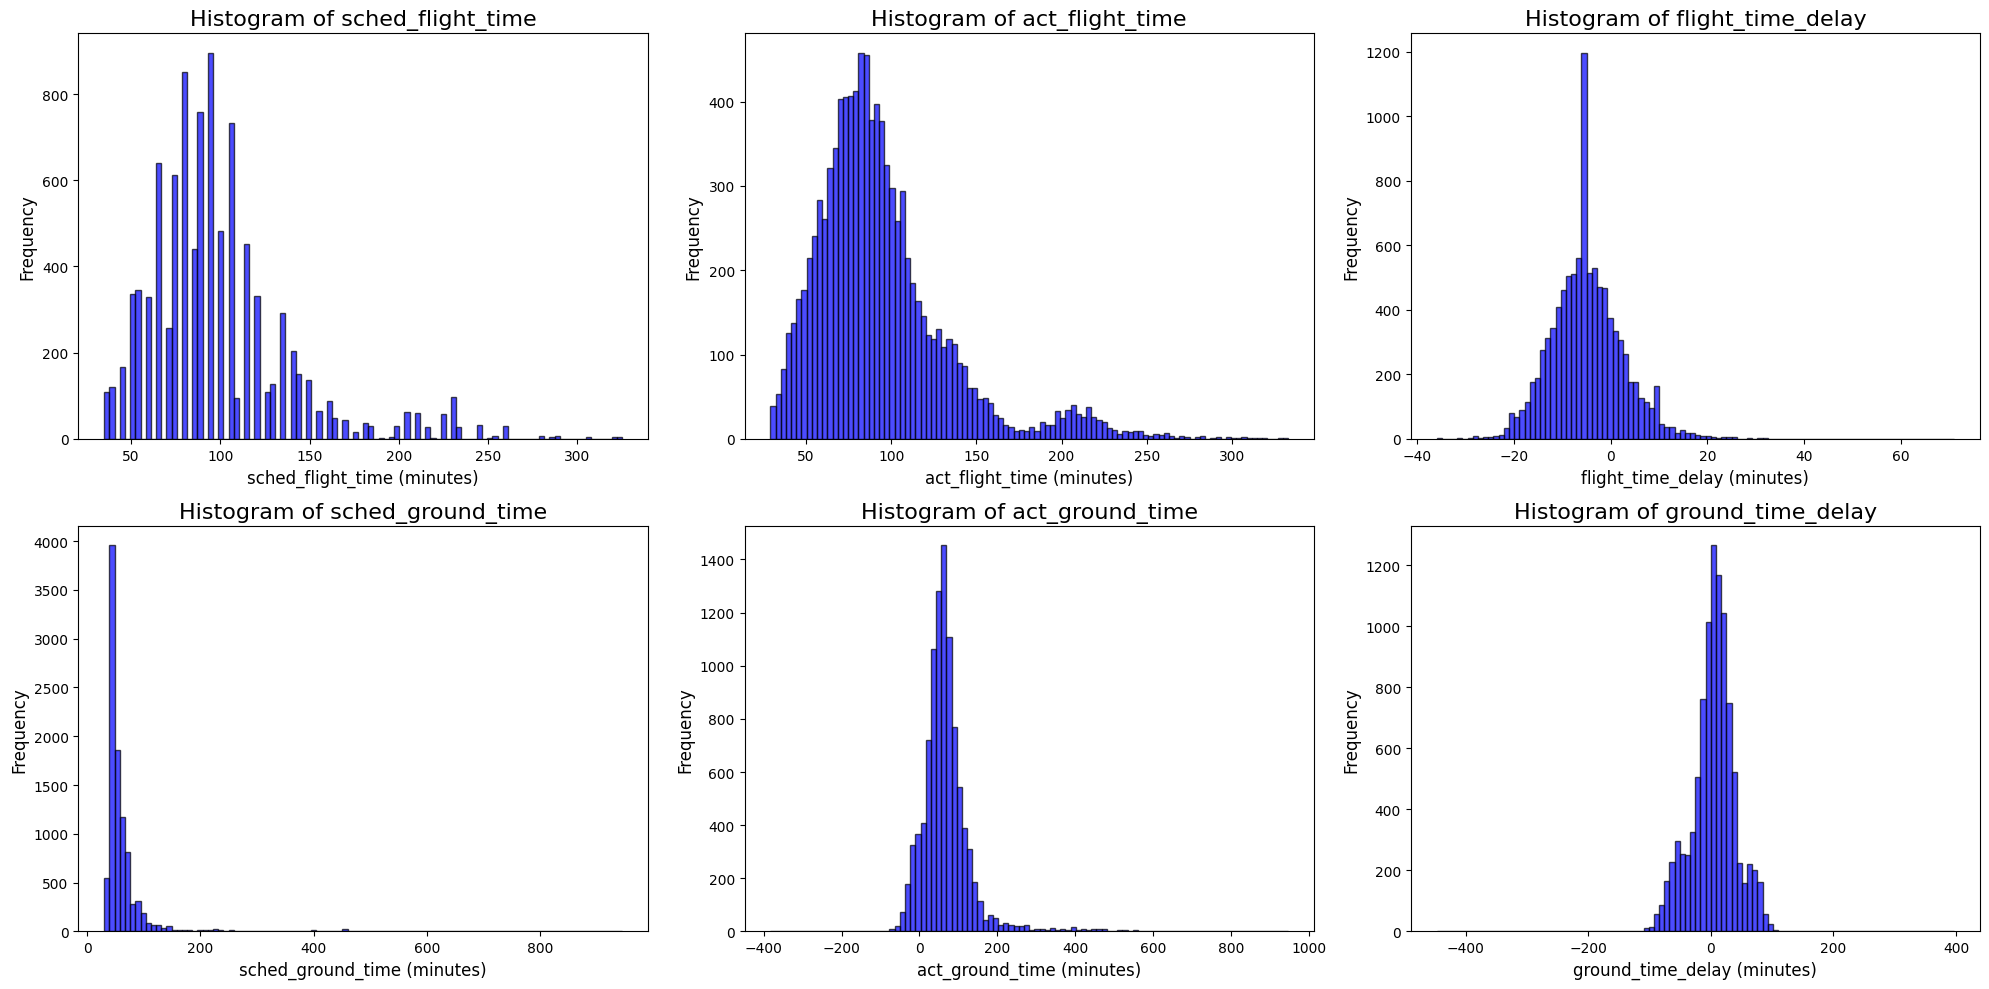

In [80]:
# List of columns to be visualized
columns = ["sched_flight_time", "act_flight_time", "flight_time_delay",
           "sched_ground_time", "act_ground_time", "ground_time_delay"]

# Set the figure size to make the plot clear
plt.figure(figsize=(20, 10))

# Iterate through each column and create subplots
for i, col in enumerate(columns, 1):
    # Create a subplot in a 4x2 grid
    plt.subplot(2, 3, i)
    
    # Create a histogram for the column data
    plt.hist(df_flight_imp[col], bins=100, color='blue', alpha=0.7, edgecolor='black')
    
    # Add a title and labels to the axes
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(f'{col} (minutes)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Automatically adjust the spacing of subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


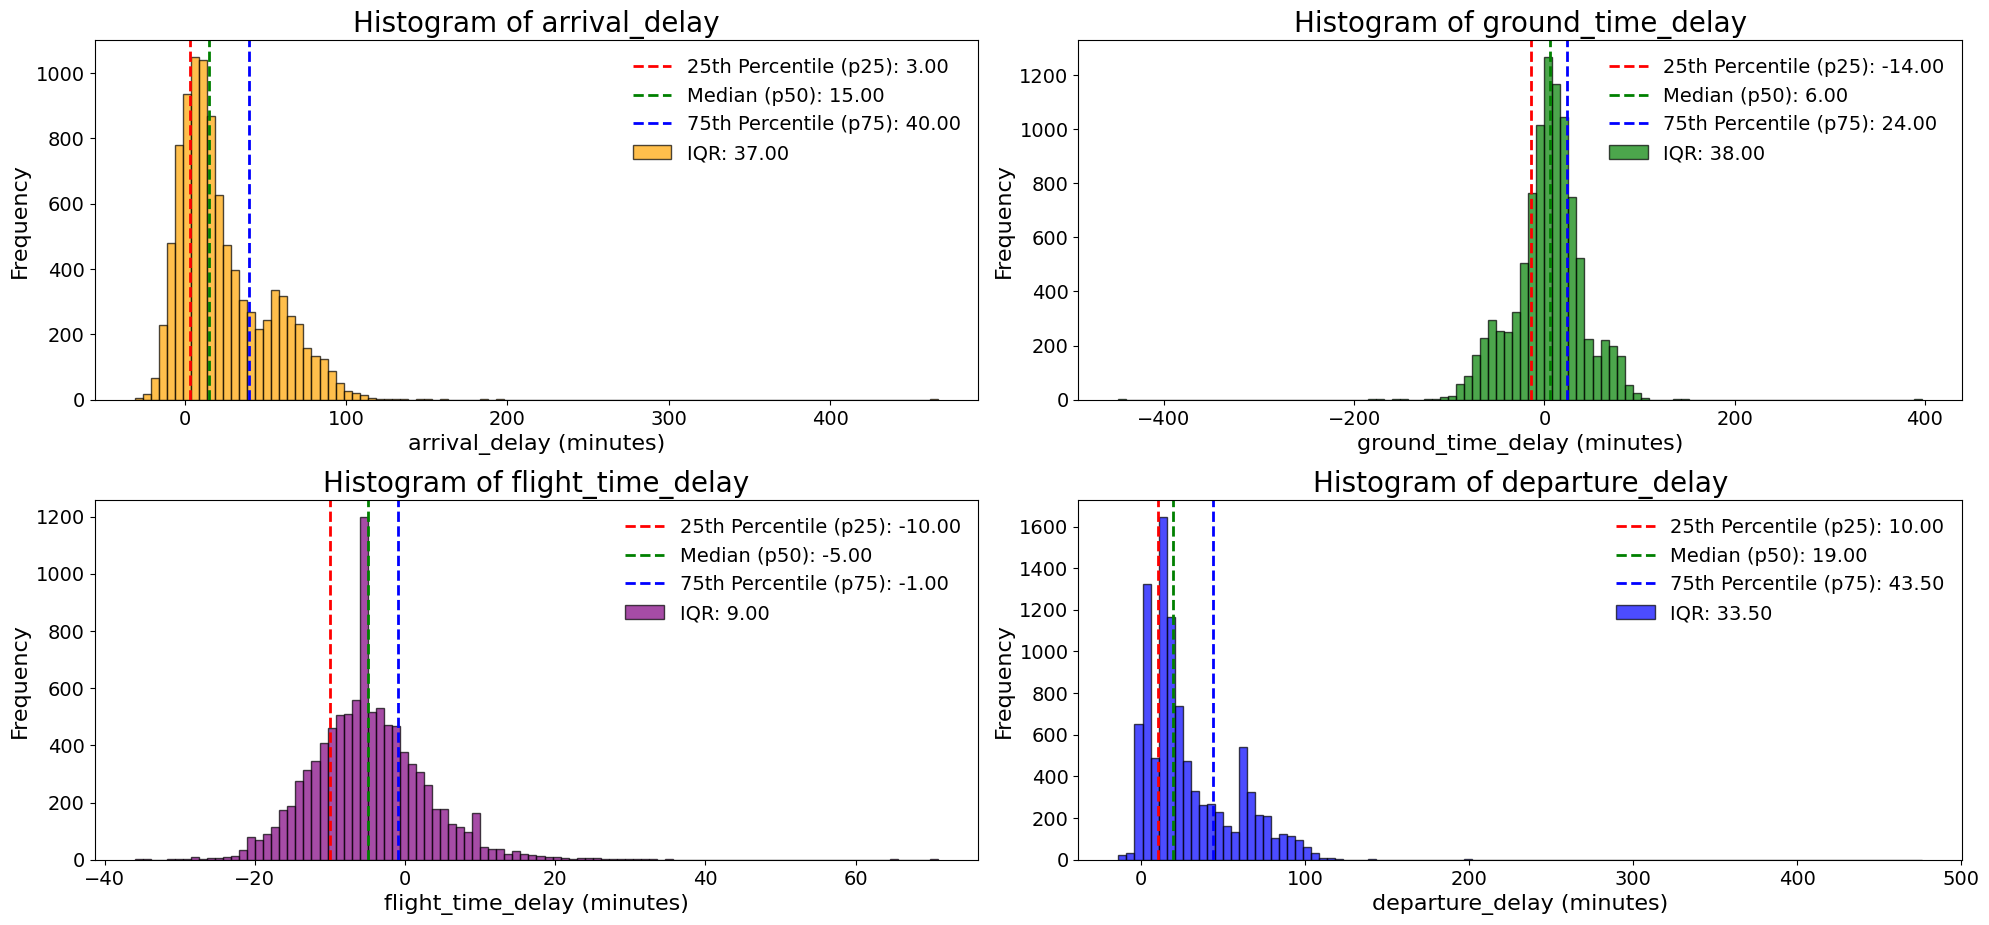

In [211]:
# List of delay columns to be visualized
columns = ["arrival_delay", "ground_time_delay", "flight_time_delay", "departure_delay"]

# Define a color map for each column
color_map = {
    "departure_delay": "blue",
    "arrival_delay": "orange",
    "ground_time_delay": "green",
    "flight_time_delay": "purple"
}

# Initialize an empty dictionary to store results
results = {}

# Set the figure size for the plot
plt.figure(figsize=(20, 18))

# Loop through each column and create subplots
for i, col in enumerate(columns, 1):
    # Drop missing values from the column
    delay_data = df_flight_imp[col].dropna()
    
    # Calculate percentiles (25%, 50%, 75%) for the delay data
    p25 = np.percentile(delay_data, 25)
    p50 = np.percentile(delay_data, 50)
    p75 = np.percentile(delay_data, 75)
    
    # Calculate the Interquartile Range (IQR)
    iqr = p75 - p25
    
    # Create a subplot in a 4x2 grid
    ax = plt.subplot(4, 2, i)
    
    # Create a histogram for the column data with the appropriate color and transparency
    ax.hist(delay_data, bins=100, color=color_map[col], alpha=0.7, edgecolor='black')
    
    # Add vertical lines for percentiles and IQR
    ax.axvline(p25, color='red', linestyle='dashed', linewidth=2)
    ax.axvline(p50, color='green', linestyle='dashed', linewidth=2)
    ax.axvline(p75, color='blue', linestyle='dashed', linewidth=2)
    
    # Add a title and labels to the axes
    ax.set_title(f'Histogram of {col}', fontsize=20)
    ax.set_xlabel(f'{col} (minutes)', fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    
    # Add a legend with percentiles and IQR values in the upper-right corner
    ax.legend(
        loc='upper right',
        labels=[
            f'25th Percentile (p25): {p25:.2f}',
            f'Median (p50): {p50:.2f}',
            f'75th Percentile (p75): {p75:.2f}',
            f'IQR: {iqr:.2f}'
        ],
        fontsize=14,
        frameon=False  # Optional: Remove frame around the legend
    )
    
    # Adjust tick labels font size for each subplot
    ax.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size for each subplot

# Automatically adjust the spacing of subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

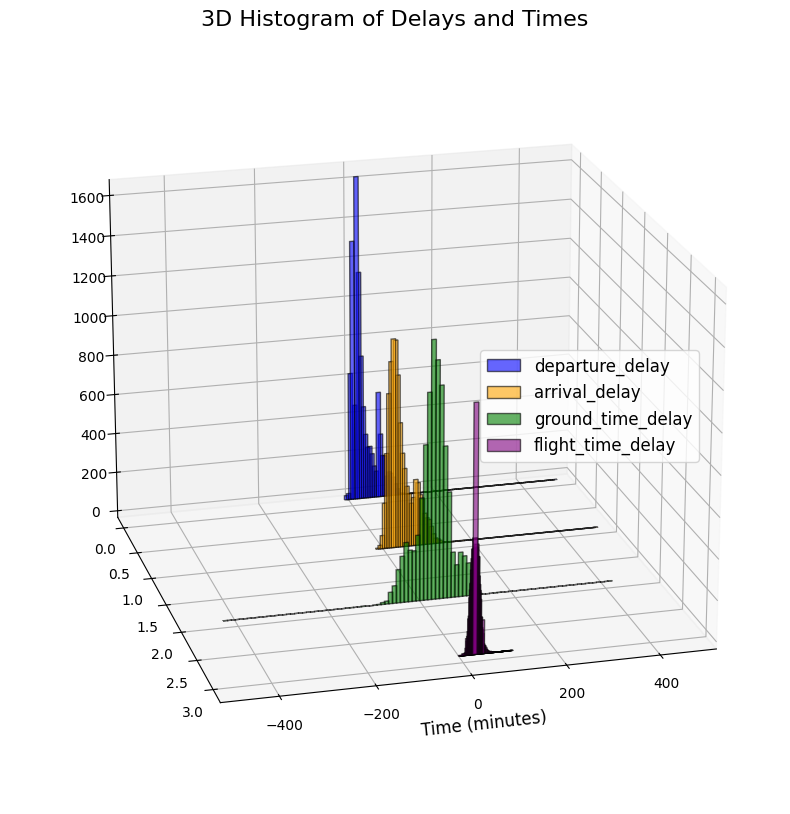

In [177]:
from mpl_toolkits.mplot3d import Axes3D

# List of columns to be visualized
columns = ["departure_delay", "arrival_delay", "ground_time_delay", "flight_time_delay"]

# Define a color map for each column
color_map = {
    "departure_delay": "blue",
    "arrival_delay": "orange",
    "ground_time_delay": "green",
    "flight_time_delay": "purple"
}

# Set the figure size for the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define the number of bins and the alpha for transparency
bins = 100
alpha = 0.6
bar_width = 10  # Reduce bar width to make them closer together

# Custom positioning to reduce space between columns
spacing_between_columns = 0.25  # Adjust this value to reduce the gap

# Create the 3D bar plot
for i, col in enumerate(columns):
    # Compute histogram data for each column
    data, edges = np.histogram(df_flight_imp[col].dropna(), bins=bins)
    
    # Create the x positions for the bars, using smaller shifts to bring them closer
    x_pos = edges[:-1] + i * (bar_width + spacing_between_columns)  # Reduce the shift for smaller spacing

    # Create 3D bars with custom spacing on the y-axis
    ax.bar(x_pos, data, zs=i, zdir='y', width=bar_width, color=color_map[col], alpha=alpha, edgecolor='black', label=col)

# Add titles and labels
ax.set_title('3D Histogram of Delays and Times', fontsize=16)
ax.set_xlabel('Time (minutes)', fontsize=12)
# ax.set_ylabel('Delay Type', fontsize=12)
# ax.set_zlabel('Frequency', fontsize=12)

# # Set custom limits to reduce the gap on the y-axis
# ax.set_ylim([-0.5, 3.5])  # Adjust these values to control how much space you want between delay types

# Set the x-axis to show negative to positive values
ax.set_xlim([500, -500])  # Set x-axis range to go from negative to positive values

# Add a legend inside the plot
ax.legend(loc='upper left', bbox_to_anchor=(0.60, 0.6), fontsize=12)  # Adjust position inside the plot

# # Add a legend for better identification
# ax.legend()

# Adjust the view angle to be more centered on the data
ax.view_init(elev=20, azim=75)  # Adjust elevation and azimuth for a centered view

# Display the plot
plt.show()

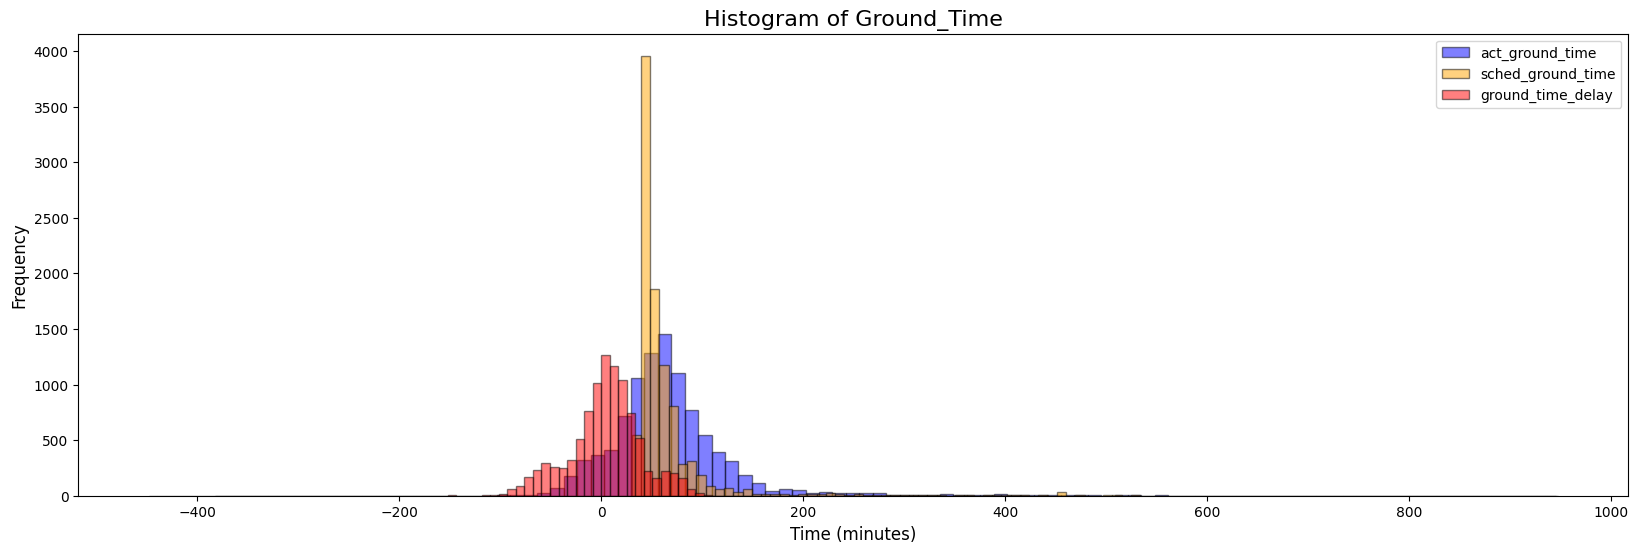

In [93]:
# Create a histogram for Ground Time
plt.figure(figsize=(20, 6))  # Set the figure size to 20x6 inches

# Histogram for 'trans_time' (blue)
plt.hist(df_flight_imp['act_ground_time'], bins=100, color='blue', alpha=0.5, label='act_ground_time', edgecolor='black')

# Histogram for 'sched_trans_time' (orange)
plt.hist(df_flight_imp['sched_ground_time'], bins=100, color='orange', alpha=0.5, label='sched_ground_time', edgecolor='black')

# Histogram for 'trans_time_delay' (orange)
plt.hist(df_flight_imp['ground_time_delay'], bins=100, color='red', alpha=0.5, label='ground_time_delay', edgecolor='black')

# Add title and axis labels
plt.title('Histogram of Ground_Time', fontsize=16)
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a legend to differentiate between the two distributions
plt.legend()

# Display the histogram
plt.show()

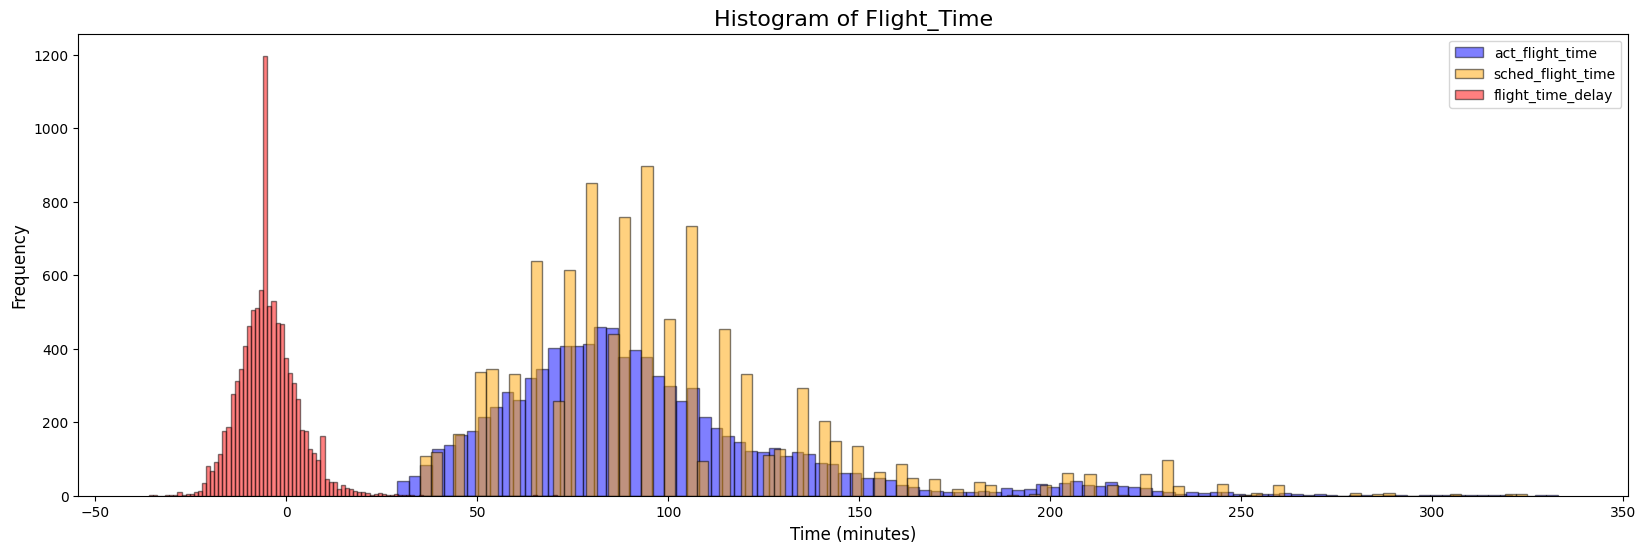

In [193]:
# Create a histogram for Flight Time
plt.figure(figsize=(20, 6))  # Set the figure size to 20x6 inches

# Histogram for 'trans_time' (blue)
plt.hist(df_flight_imp['act_flight_time'], bins=100, color='blue', alpha=0.5, label='act_flight_time', edgecolor='black')

# Histogram for 'sched_trans_time' (orange)
plt.hist(df_flight_imp['sched_flight_time'], bins=100, color='orange', alpha=0.5, label='sched_flight_time', edgecolor='black')

# Histogram for 'trans_time_delay' (orange)
plt.hist(df_flight_imp['flight_time_delay'], bins=100, color='red', alpha=0.5, label='flight_time_delay', edgecolor='black')

# Add title and axis labels
plt.title('Histogram of Flight_Time', fontsize=16)
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a legend to differentiate between the two distributions
plt.legend()

# Display the histogram
plt.show()

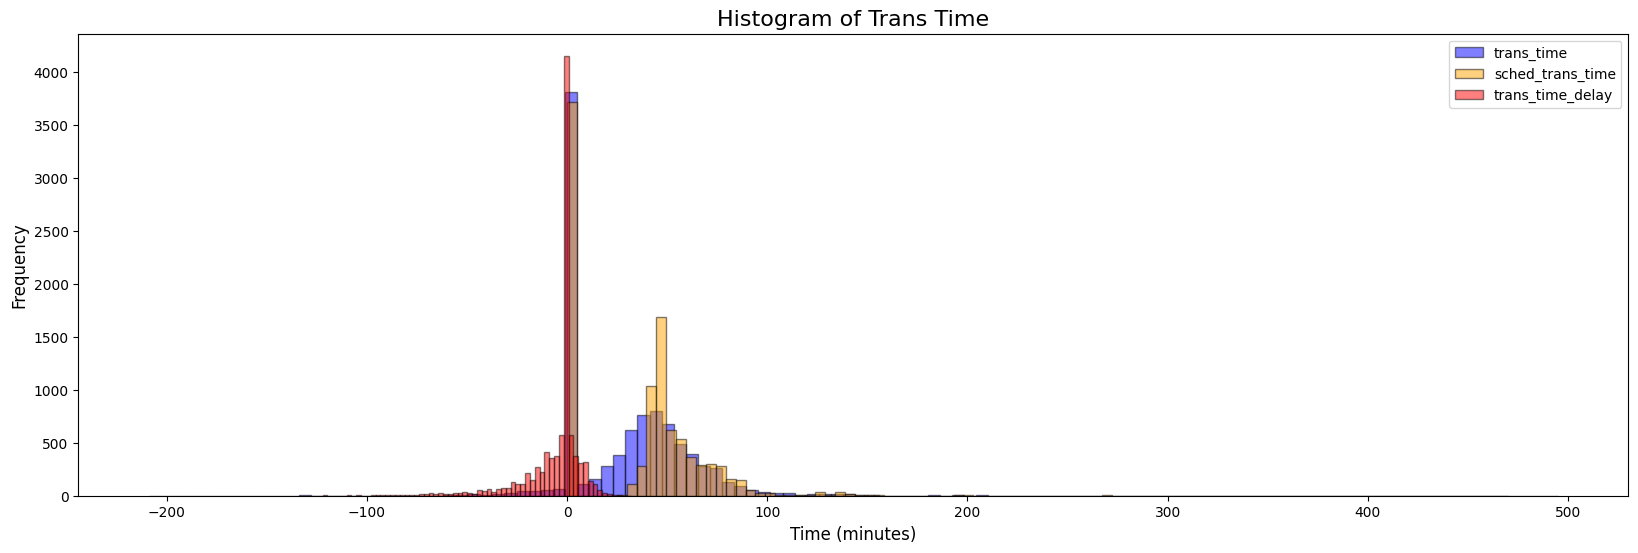

In [194]:
# Create a histogram for Trans Time
plt.figure(figsize=(20, 6))  # Set the figure size to 20x6 inches

# Histogram for 'trans_time' (blue)
plt.hist(df_flight_imp['trans_time'], bins=100, color='blue', alpha=0.5, label='trans_time', edgecolor='black')

# Histogram for 'sched_trans_time' (orange)
plt.hist(df_flight_imp['sched_trans_time'], bins=100, color='orange', alpha=0.5, label='sched_trans_time', edgecolor='black')

# Histogram for 'trans_time_delay' (orange)
plt.hist(df_flight_imp['trans_time_delay'], bins=100, color='red', alpha=0.5, label='trans_time_delay', edgecolor='black')

# Add title and axis labels
plt.title('Histogram of Trans Time', fontsize=16)
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a legend to differentiate between the two distributions
plt.legend()

# Display the histogram
plt.show()

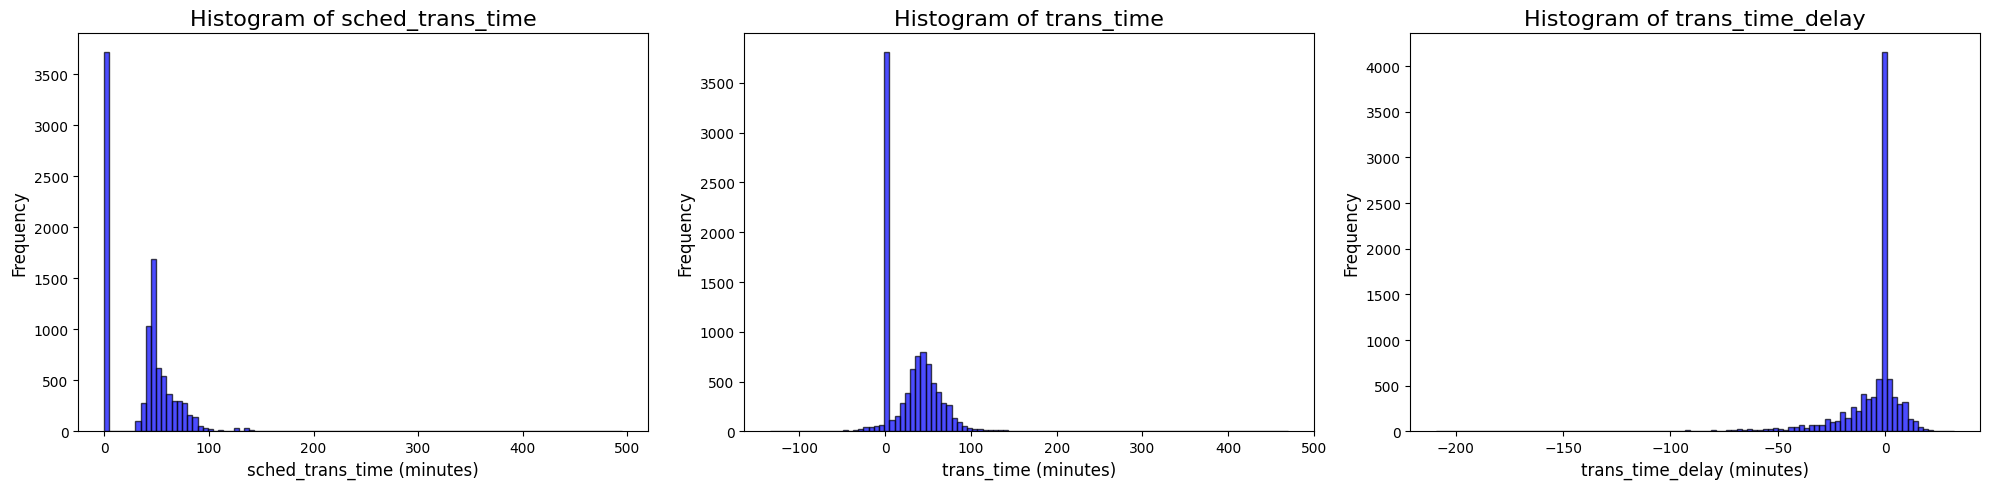

In [83]:
# List of columns to be visualized
columns = ["sched_trans_time", "trans_time", "trans_time_delay"]

# Set the figure size to make the plot clear
plt.figure(figsize=(20, 5))

# Iterate through each column and create subplots
for i, col in enumerate(columns, 1):
    # Create a subplot in a 4x2 grid
    plt.subplot(1, 3, i)
    
    # Create a histogram for the column data
    plt.hist(df_flight_imp[col], bins=100, color='blue', alpha=0.7, edgecolor='black')
    
    # Add a title and labels to the axes
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(f'{col} (minutes)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Automatically adjust the spacing of subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


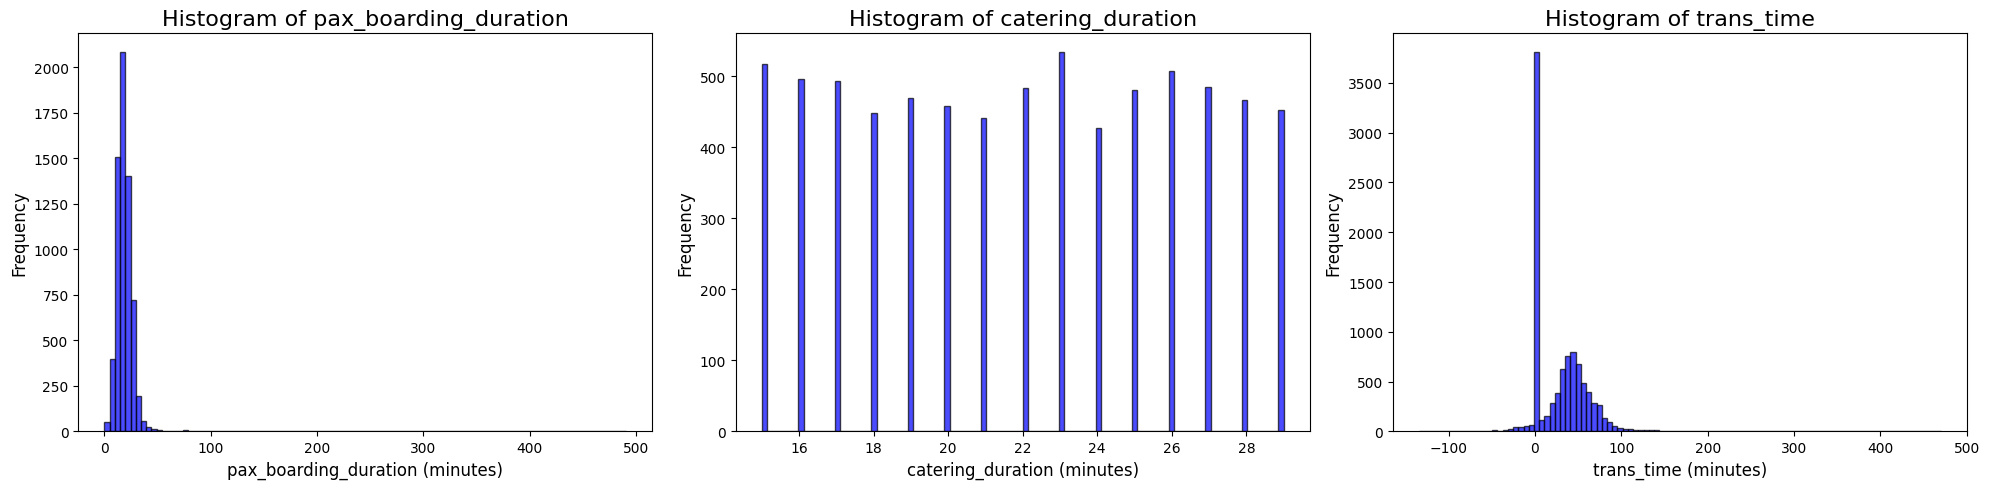

In [188]:
# List of columns to be visualized
columns = ["pax_boarding_duration", "catering_duration", "trans_time"]

# Set the figure size to make the plot clear
plt.figure(figsize=(20, 5))

# Iterate through each column and create subplots
for i, col in enumerate(columns, 1):
    # Create a subplot in a 4x2 grid
    plt.subplot(1, 3, i)
    
    # Create a histogram for the column data
    plt.hist(df_flight_imp[col], bins=100, color='blue', alpha=0.7, edgecolor='black')
    
    # Add a title and labels to the axes
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(f'{col} (minutes)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Automatically adjust the spacing of subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

#### df_ground_imp

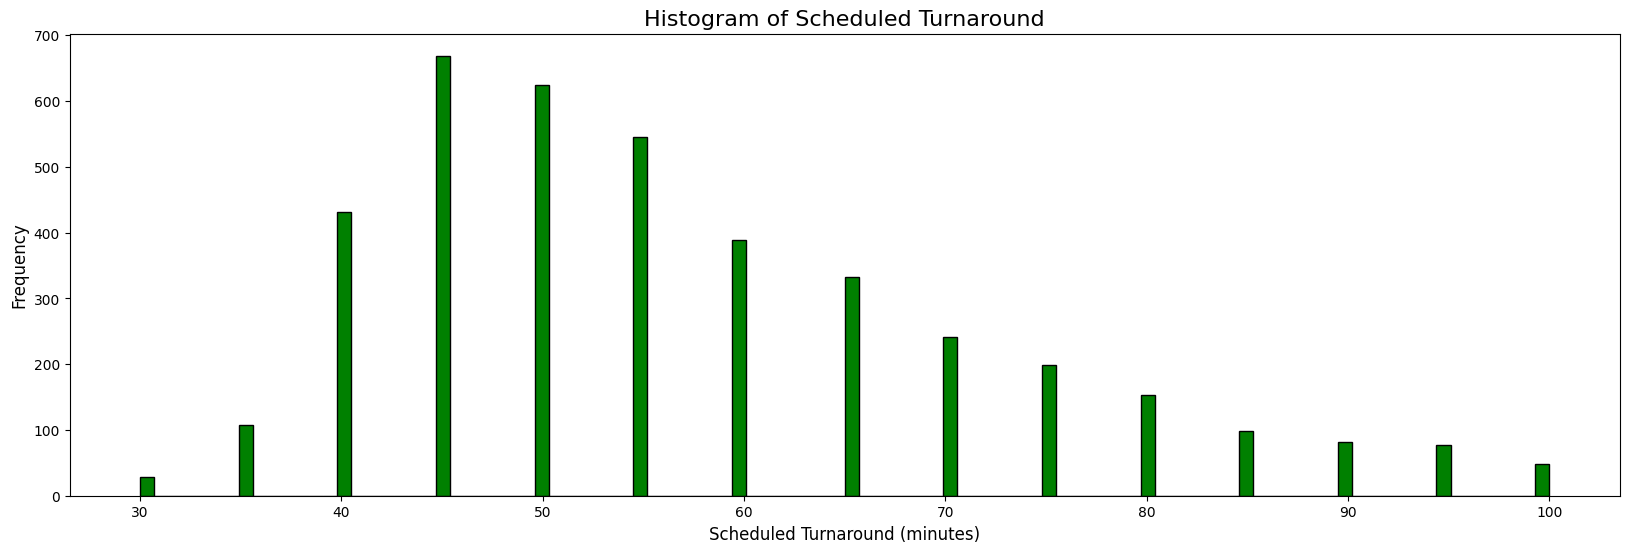

In [195]:
# Create a histogram for the 'sched_turnaround' column
plt.figure(figsize=(20, 6))  # Set the figure size to 20x6 inches
plt.hist(df_ground_imp['sched_turnaround'], bins=100, color='green', edgecolor='black')

# Add title and axis labels
plt.title('Histogram of Scheduled Turnaround', fontsize=16)  # Set the title of the histogram
plt.xlabel('Scheduled Turnaround (minutes)', fontsize=12)    # Set the x-axis label
plt.ylabel('Frequency', fontsize=12)                         # Set the y-axis label

# Show the histogram
plt.show()

### Personel attribute

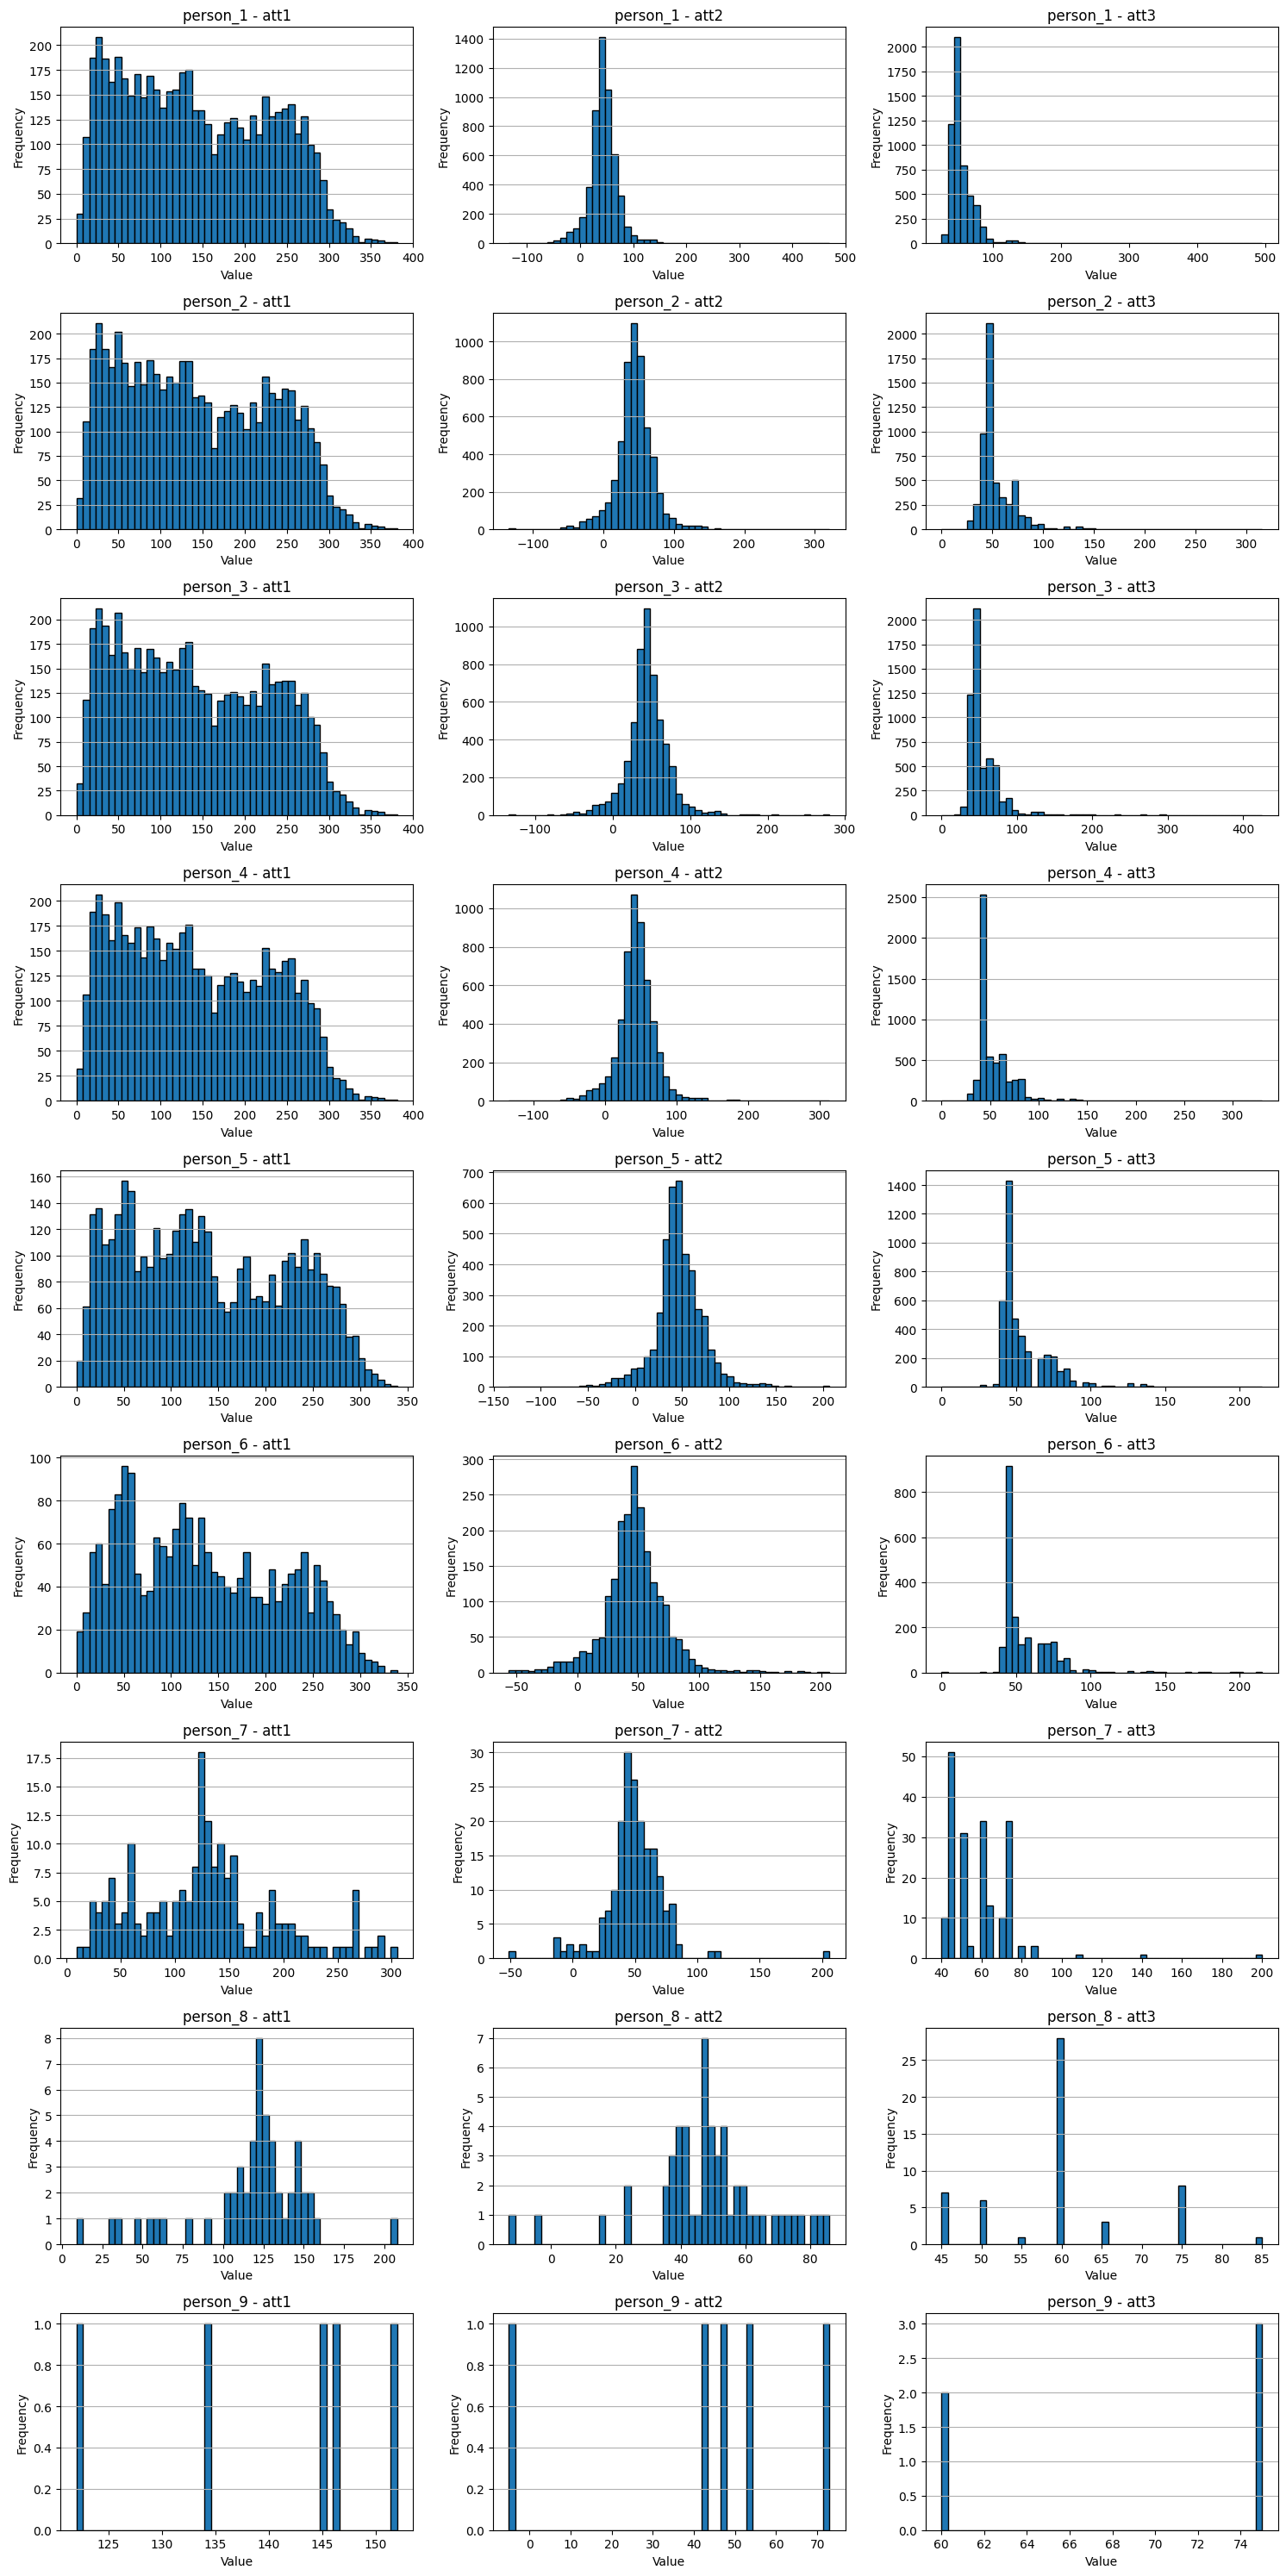

In [198]:
# Create subplots (9 rows, 3 columns)
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 30))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots

# Loop through each person and attribute to create histograms
for i in range(9):
    for j in range(3):
        # Construct column names dynamically
        person = f'person_{i+1}'
        att = f'att{j+1}'
        column_name = f'{person}_{att}'
        
        # Drop NaN values from the series
        values = df_personal[column_name].dropna()
        
        # Check if there are values to plot
        if not values.empty:
            # Create histogram with 50 bins and black edges
            axes[i, j].hist(values.astype(float), bins=50, edgecolor='black')  # Convert to float for consistency
            
        # Set title, labels, and grid for each subplot
        axes[i, j].set_title(f'{person} - {att}')
        axes[i, j].set_xlabel('Value')
        axes[i, j].set_ylabel('Frequency')
        axes[i, j].grid(axis='y')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

## Data export

In [199]:
# Save the DataFrames as CSV files
df_flight_imp.to_csv('df_flight_imp.csv', index=False)  # Save flight data without the index column
df_ground_imp.to_csv('df_ground_imp.csv', index=False)  # Save ground data without the index column
df_personal.to_csv('df_personal_imp.csv', index=False)  # Save personal data without the index column

#### Mögliche Ausreißereliminierung

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Definiere die Spalten, für die Schiefe und Kurtosis berechnet werden sollen
columns = ["sched_flight_time", "act_flight_time", "trans_time", "sched_trans_time", 
           "sched_ground_time", "act_ground_time", "pax_boarding_duration"]

# Erstelle eine leere Liste, um die Ergebnisse zu speichern
results = []

# Berechne Schiefe und Kurtosis für jede Spalte und speichere die Ergebnisse
for col in columns:
    schiefe = skew(df_flight_imp[col].dropna())  # dropna(), um mit fehlenden Werten umzugehen
    woelbung = kurtosis(df_flight_imp[col].dropna(), fisher=True)  # exzessive Kurtosis
    results.append([col, schiefe, woelbung])

# Konvertiere die Ergebnisse in ein DataFrame für eine saubere Darstellung
df_results = pd.DataFrame(results, columns=["Spalte", "Skewness", "Kurtosis"])

# Zeige die Ergebnisse in tabellarischer Form an
print(df_results)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Angenommene Daten aus df_flight_imp
columns = [
    "sched_flight_time",
    "act_flight_time",
    "trans_time",
    "sched_trans_time",
    "sched_ground_time",
    "act_ground_time",
    "pax_boarding_duration",
]

# Beispiel: df_flight_imp als DataFrame laden
# df_flight_imp = pd.read_csv('your_data_file.csv')

# Initialisieren des Subplots
num_columns = len(columns)
fig, axes = plt.subplots(num_columns, 2, figsize=(14, num_columns * 4))

for i, column in enumerate(columns):
    # Berechnung des IQR
    Q1 = df_flight_imp[column].quantile(0.25)
    Q3 = df_flight_imp[column].quantile(0.75)
    IQR = Q3 - Q1

    # Ausreißergrenzen definieren
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Daten vor der Ausreißereliminierung
    sns.histplot(df_flight_imp[column], bins=30, ax=axes[i, 0], color='blue', kde=True)
    axes[i, 0].set_title(f'Before Outlier Removal: {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Ausreißereliminierung
    filtered_data = df_flight_imp[(df_flight_imp[column] >= lower_bound) & (df_flight_imp[column] <= upper_bound)]

    # Daten nach der Ausreißereliminierung
    sns.histplot(filtered_data[column], bins=30, ax=axes[i, 1], color='orange', kde=True)
    axes[i, 1].set_title(f'After Outlier Removal: {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Frequency')

# Layout anpassen
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Angenommene Daten aus df_flight_imp
columns = [
    "sched_flight_time",
    "act_flight_time",
    "trans_time",
    "sched_trans_time",
    "sched_ground_time",
    "act_ground_time",
    "pax_boarding_duration",
]

# Beispiel: df_flight_imp als DataFrame laden
# df_flight_imp = pd.read_csv('your_data_file.csv')

# Kopie des Datensatzes erstellen, um Ausreißer zu entfernen
df_flight_imp_nooutliers = df_flight_imp.copy()

# Initialisieren des Subplots
num_columns = len(columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(14, num_columns * 4))

for i, column in enumerate(columns):
    # Berechnung des IQR
    Q1 = df_flight_imp[column].quantile(0.25)
    Q3 = df_flight_imp[column].quantile(0.75)
    IQR = Q3 - Q1

    # Ausreißergrenzen definieren
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Daten vor der Ausreißereliminierung
    sns.histplot(df_flight_imp[column], bins=30, ax=axes[i], color='blue', kde=True, label='Before Removal', stat='density')
    axes[i].set_title(f'Outlier Removal: {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

    # Anzahl der Ausreißer in der aktuellen Spalte berechnen
    num_outliers = df_flight_imp[(df_flight_imp[column] < lower_bound) | (df_flight_imp[column] > upper_bound)].shape[0]

    # Ausreißer im DataFrame entfernen
    df_flight_imp_nooutliers = df_flight_imp_nooutliers[
        (df_flight_imp_nooutliers[column] >= lower_bound) & 
        (df_flight_imp_nooutliers[column] <= upper_bound)
    ]

    # Daten nach der Ausreißereliminierung
    sns.histplot(df_flight_imp_nooutliers[column], bins=30, ax=axes[i], color='orange', kde=True, label='After Removal', stat='density')
    
    # Legende hinzufügen
    axes[i].legend()
    
    # Anmerkung zur Anzahl der Ausreißer hinzufügen
    axes[i].text(0.95, 0.75, f'Outliers: {num_outliers}', fontsize=12, ha='right', va='top', transform=axes[i].transAxes)

# Layout anpassen
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Definiere die Spalten, für die Schiefe und Kurtosis berechnet werden sollen
columns = ["sched_flight_time", "act_flight_time", "trans_time", "sched_trans_time", 
           "sched_ground_time", "act_ground_time", "pax_boarding_duration"]

# Erstelle eine leere Liste, um die Ergebnisse zu speichern
results = []

# Berechne Schiefe und Kurtosis für jede Spalte und speichere die Ergebnisse
for col in columns:
    schiefe = skew(df_flight_imp_nooutliers[col].dropna())  # dropna(), um mit fehlenden Werten umzugehen
    woelbung = kurtosis(df_flight_imp_nooutliers[col].dropna(), fisher=True)  # exzessive Kurtosis
    results.append([col, schiefe, woelbung])

# Konvertiere die Ergebnisse in ein DataFrame für eine saubere Darstellung
df_results = pd.DataFrame(results, columns=["Spalte", "Skewness", "Kurtosis"])

# Zeige die Ergebnisse in tabellarischer Form an
print(df_results)


In [ ]:
# Wählen Sie nur die numerischen Spalten aus dem DataFrame
numeric_df_flight_nooutliers = df_flight_imp_nooutliers.select_dtypes(include=[float, int])

# Berechne die Korrelationsmatrix
correlation_matrix = numeric_df_flight_nooutliers.corr()

# Extrahiere die Korrelationen zur 'flight_time_delay' Spalte
flight_time_delay_corr = correlation_matrix['flight_time_delay'].drop('flight_time_delay').sort_values(ascending=False)  # Drop self-correlation

flight_time_delay_corr_df = flight_time_delay_corr.to_frame(name='Correlation')

plt.figure(figsize=(4, 18))
sns.heatmap(flight_time_delay_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'flight_time_delay' with numerical features")
plt.show()

# Display the correlations
print(flight_time_delay_corr) 
# Display the heatmap
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_flight_imp_nooutliers is your DataFrame and already populated

# One-Hot Encoding for all categorical features
categorical_columns = [
    'dep_time_of_day',
    'arr_time_of_day',
    'arr_weekday',
    'dep_inbound_weekday',
    'ac_type_code',
    # 'ac_registration',
    'change_reason_code',
    'crew_group',
]

# Get dummies for each categorical feature and concatenate
df_encoded = pd.get_dummies(df_flight_imp_nooutliers[categorical_columns], drop_first=False)

# Concatenate the encoded DataFrame with the original 'del_flight_time'
df_flight_imp_nooutliers_encoded = pd.concat([df_flight_imp_nooutliers['del_flight_time'], df_encoded], axis=1)

# Calculate the correlation between del_flight_time and the new one-hot encoded columns
correlation_matrix = df_flight_imp_nooutliers_encoded.corr()

# Extract correlations with del_flight_time
del_flight_time_corr = correlation_matrix['del_flight_time'].drop('del_flight_time').sort_values(ascending=False)  # Drop self-correlation

del_flight_time_corr_df = del_flight_time_corr.to_frame(name='Correlation')

plt.figure(figsize=(4, 18))
sns.heatmap(del_flight_time_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'del_flight_time' with One-Hot Encoded Features")
plt.show()

# Display the correlations
print(del_flight_time_corr) 
# Display the heatmap
plt.show()


In [ ]:
# Wählen Sie nur die numerischen Spalten aus dem DataFrame
numeric_df_flight_imp_nooutliers = df_flight_imp_nooutliers.select_dtypes(include=[float, int])

# Berechne die Korrelationsmatrix
correlation_matrix = numeric_df_flight_imp_nooutliers.corr()

# Extrahiere die Korrelationen zur 'act_flight_time' Spalte
act_flight_time_corr = correlation_matrix['act_flight_time'].drop('act_flight_time').sort_values(ascending=False)  # Drop self-correlation

act_flight_time_corr_df = act_flight_time_corr.to_frame(name='Correlation')

plt.figure(figsize=(4, 18))
sns.heatmap(act_flight_time_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'act_flight_time' with numerical features")
plt.show()

# Display the correlations
print(act_flight_time_corr) 
# Display the heatmap
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_flight_imp_nooutliers is your DataFrame and already populated

# One-Hot Encoding for all categorical features
categorical_columns = [
    'dep_time_of_day',
    'arr_time_of_day',
    'arr_weekday',
    'dep_inbound_weekday',
    'ac_type_code',
    # 'ac_registration',
    'change_reason_code',
    'crew_group',
]

# Get dummies for each categorical feature and concatenate
df_encoded = pd.get_dummies(df_flight_imp_nooutliers[categorical_columns], drop_first=False)

# Concatenate the encoded DataFrame with the original 'act_flight_time'
df_flight_imp_nooutliers_encoded = pd.concat([df_flight_imp_nooutliers['act_flight_time'], df_encoded], axis=1)

# Calculate the correlation between act_flight_time and the new one-hot encoded columns
correlation_matrix = df_flight_imp_nooutliers_encoded.corr()

# Extract correlations with act_flight_time
act_flight_time_corr = correlation_matrix['act_flight_time'].drop('act_flight_time').sort_values(ascending=False)  # Drop self-correlation

act_flight_time_corr_df = act_flight_time_corr.to_frame(name='Correlation')

plt.figure(figsize=(4, 18))
sns.heatmap(act_flight_time_corr_df, annot=True, cmap="coolwarm", center=0, vmin=-0.35, vmax=0.35, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of 'act_flight_time' with One-Hot Encoded Features")
plt.show()

# Display the correlations
print(act_flight_time_corr) 
# Display the heatmap
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from pyod.models.knn import KNN

# Angenommen, df_flight_imp ist Ihr DataFrame und 'flight_time_delay' ist die Spalte mit den Flugdaten
data = df_flight_imp[['flight_time_delay']].values  # Umwandeln in ein numpy Array

# Initialisieren Sie das KNN-Modell
model = KNN()

# Fitte das Modell an die Daten
model.fit(data)

# Vorhersagen der Ausreißer (1 = Ausreißer, 0 = Normal)
outliers = model.labels_  # 1 für Ausreißer, 0 für normale Daten

# Fügen Sie die Ausreißer-Labels zurück in den ursprünglichen DataFrame ein
df_flight_imp['outlier'] = outliers

# Erstellen Sie einen neuen DataFrame ohne Ausreißer
df_cleaned = df_flight_imp[df_flight_imp['outlier'] == 0].copy()



# Erstellen Sie ein Diagramm
plt.figure(figsize=(10, 6))

# Scatterplot der Datenpunkte
plt.scatter(range(len(data)), data, c='blue', label='Normal', alpha=0.5)

# Markieren Sie die Ausreißer
plt.scatter(np.where(outliers == 1)[0], data[outliers == 1], c='red', label='Outlier', alpha=0.7)

# Titel und Labels
plt.title('Outlier Detection using PyOD (KNN)', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('flight_time_delay', fontsize=12)
plt.legend()
plt.grid()

# Zeigen Sie das Diagramm
plt.show()



# Erstellen Sie ein Histogramm der bereinigten 'flight_time_delay' Daten
plt.figure(figsize=(20, 6))

# Histogramm für die bereinigten 'flight_time_delay' Daten
plt.hist(df_cleaned['flight_time_delay'], bins=100, color='green', alpha=0.7, edgecolor='black')

# Fügen Sie Titel und Achsenbeschriftungen hinzu
plt.title('Histogram of Cleaned Del Flight Time (without Outliers)', fontsize=16)
plt.xlabel('Del Flight Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Zeigen Sie das Histogramm
plt.grid()
plt.show()
